In [ ]:
!pip install squarify
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 65.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.decomposition import PCA
from pywaffle import Waffle
from scipy import stats
from scipy.stats.mstats import winsorize
from math import sqrt

warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("train.csv")
df = df.copy()
pd.set_option('display.max_columns', 100)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
df.describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [6]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [7]:
df["Over18"].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [8]:
df = df.drop(['StandardHours','EmployeeCount','EmployeeNumber',"Over18"],axis=1)

In [9]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
attrition_color = '#9a09ae'
retention_color = '#15ae68'
text_color = '#2E4053'
background_color = '#fcfcfc'

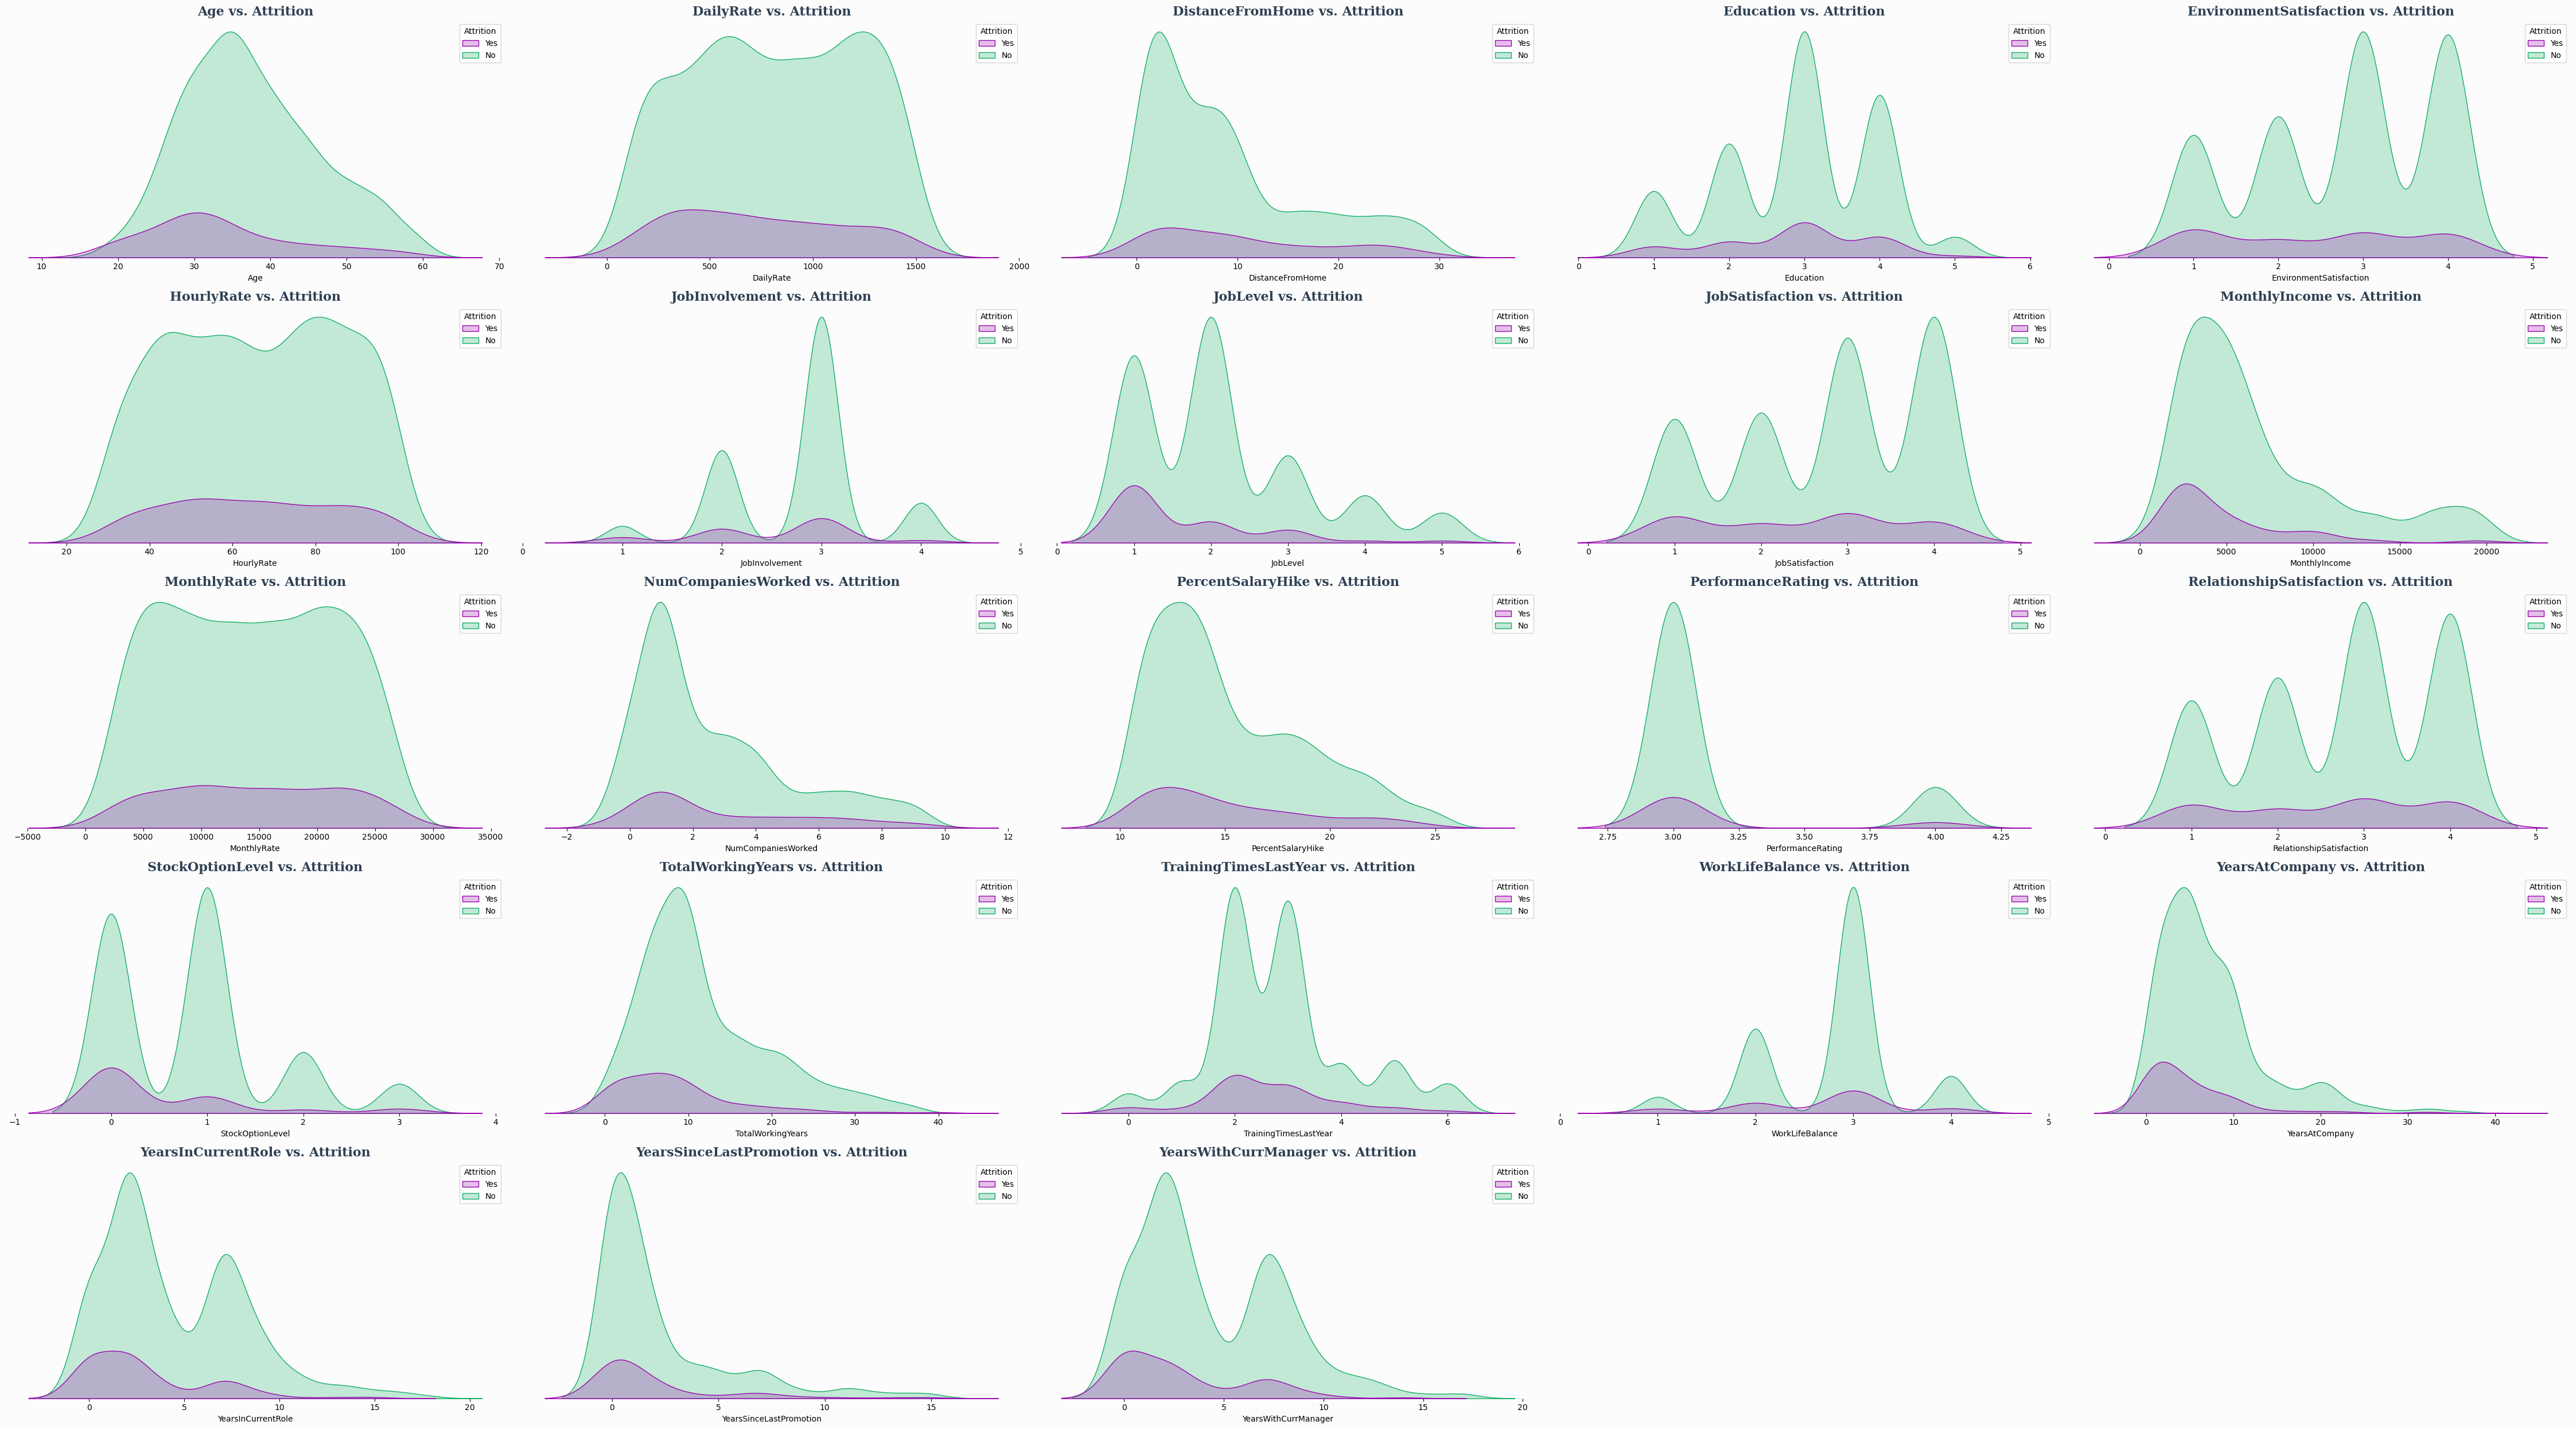

In [12]:

num_columns = df.select_dtypes(include=['number']).columns
num_cols = len(num_columns)
cols = 5
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(45, rows * 5))
axes = axes.flatten()
for i, col in enumerate(num_columns):
    sns.kdeplot(ax=axes[i], x=col, hue='Attrition', data=df, fill=True, palette=[attrition_color, retention_color])
    axes[i].set_title(f'{col} vs. Attrition', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight': 'bold'})
    axes[i].set_facecolor(background_color)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)
    axes[i].patch.set_facecolor(background_color)

for j in range(len(num_columns), len(axes)):
    axes[j].axis('off')


plt.tight_layout()
fig.patch.set_facecolor(background_color)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()


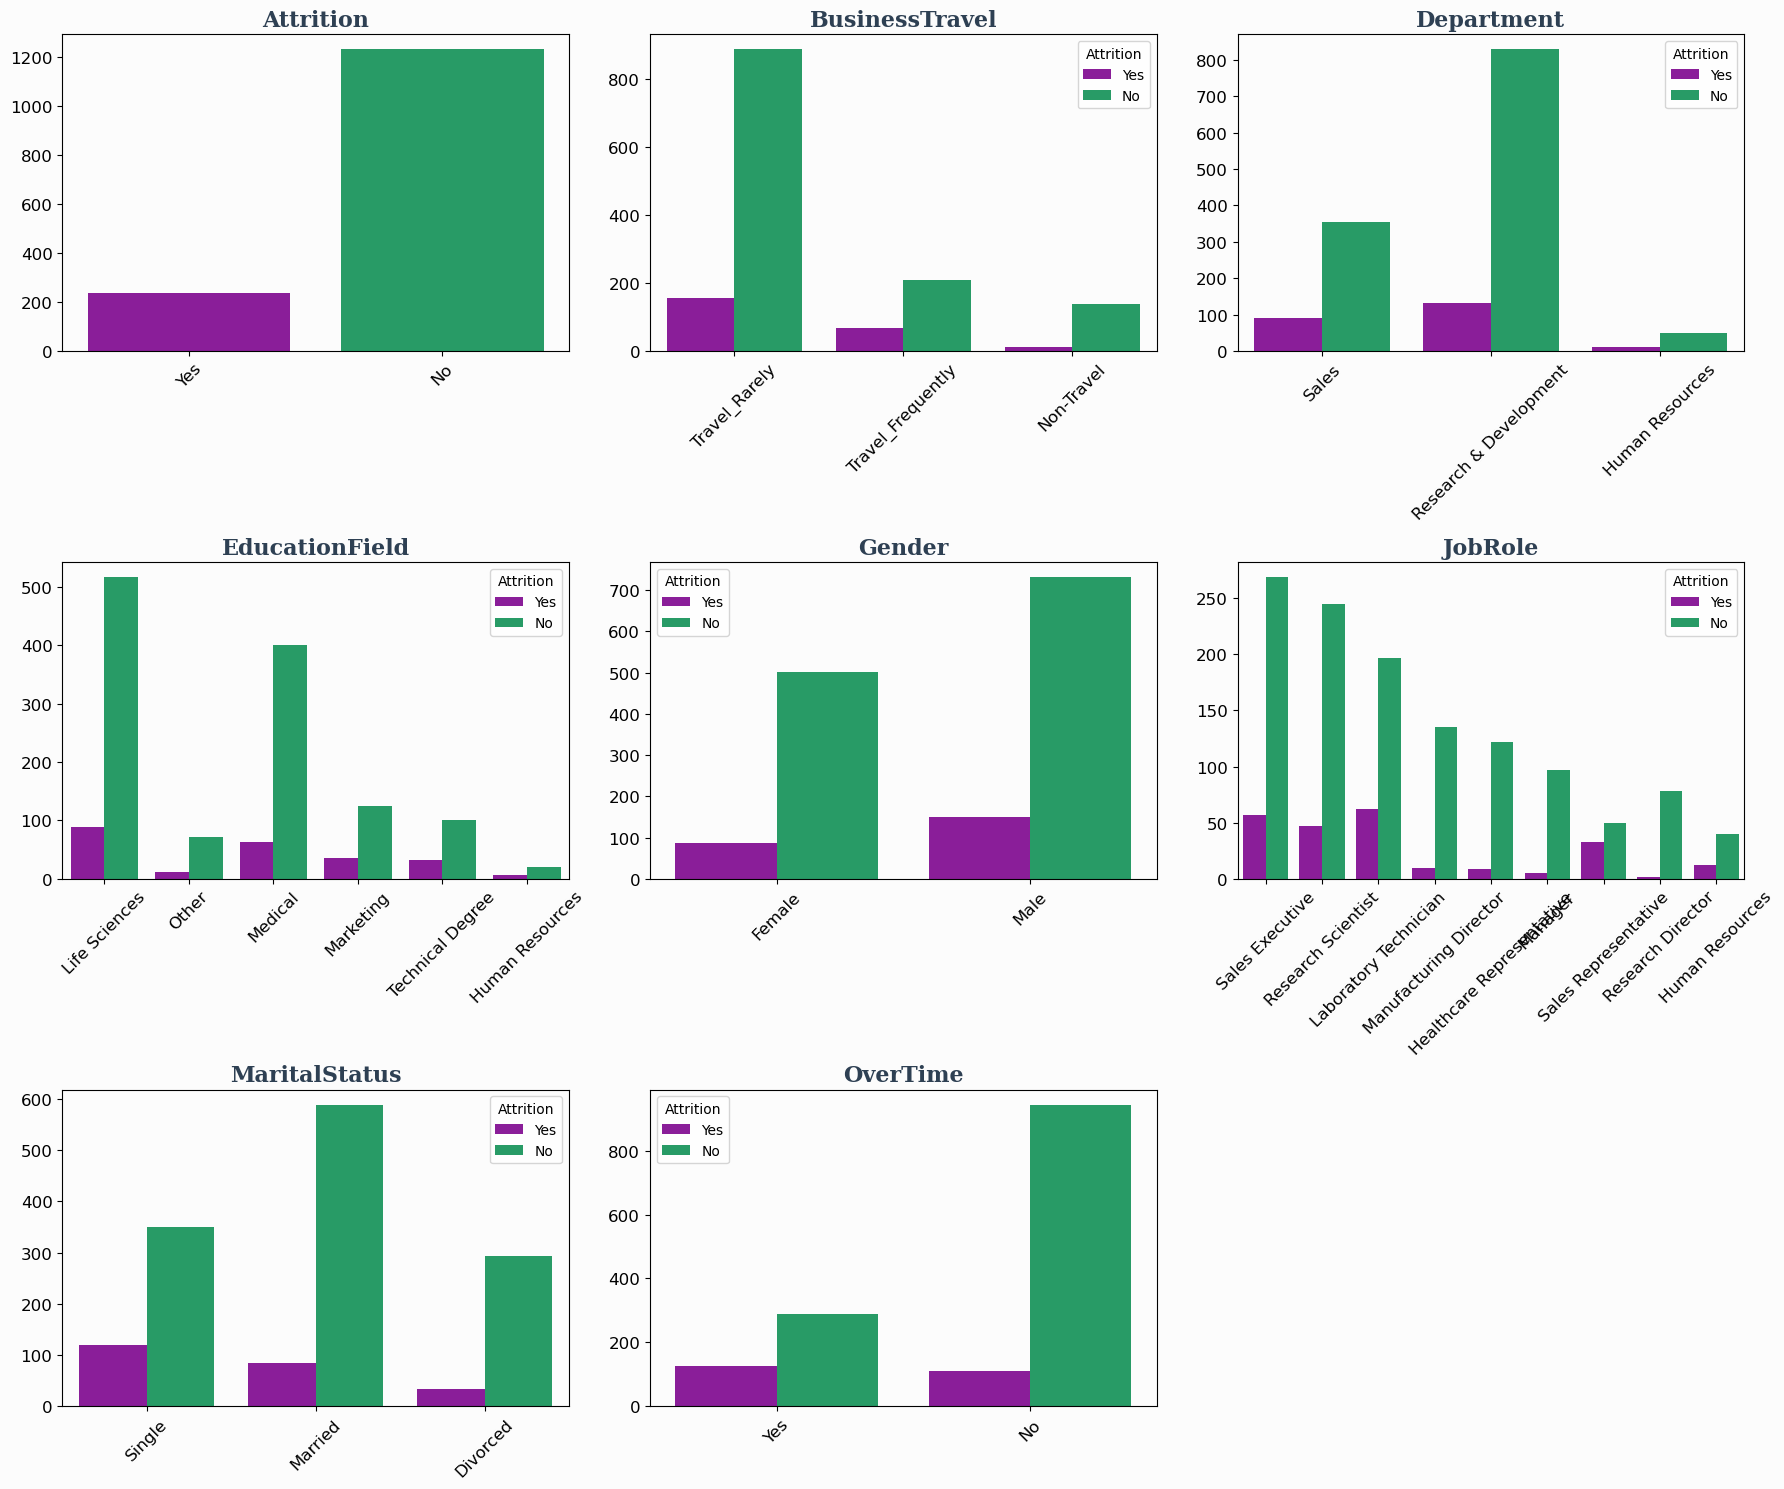

In [13]:

object_columns = df.select_dtypes(include=['object']).columns


num_cols = len(object_columns)
cols = 3
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()


for i, col in enumerate(object_columns):
    sns.countplot(ax=axes[i], x=col, data=df, hue='Attrition', palette=[attrition_color, retention_color])
    axes[i].set_title(f'{col}', fontdict={'font': 'Serif', 'color': text_color, 'weight': 'bold', 'size': 16})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].set_facecolor(background_color)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')


fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()


In [14]:
df_num = df
df_dummies = pd.get_dummies(df['Attrition'],drop_first=True,dtype=int)
df = pd.concat([df_num,df_dummies],axis=1)


In [15]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [16]:

df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')
df_dummies = pd.get_dummies(df_obj,drop_first=True,dtype=int)
df_feat = pd.concat([df_num,df_dummies],axis=1)
df_feat = df_feat.drop('Yes',axis=1)

In [17]:
intt = df.select_dtypes(exclude=['object'])
coll = df.select_dtypes(exclude=['object'])
intt.corr()['Yes'].sort_values()


TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Yes                         1.000000
Name: Yes, dtype: float64

In [19]:
intt['age_cat'] = pd.cut(intt['Age'], bins = [13,18, 45,60], labels = ['Teens', 'Adults','Mid Adults'])
df['TotalWorkingYearscat'] = pd.cut(df['TotalWorkingYears'], bins = [0,10,20, 30,40], labels = ['0-10', '10-20', '20-30','30-40'])
df['MonthlyIncomedcat'] = pd.cut(df['MonthlyIncome'], bins = [0,5000,10000, 15000,20000], labels = ['0-5000', '5000-10000', '10000-15000','15000-20000'])

In [20]:
intt['age_cat'].value_counts()

age_cat
Adults        1189
Mid Adults     273
Teens            8
Name: count, dtype: int64

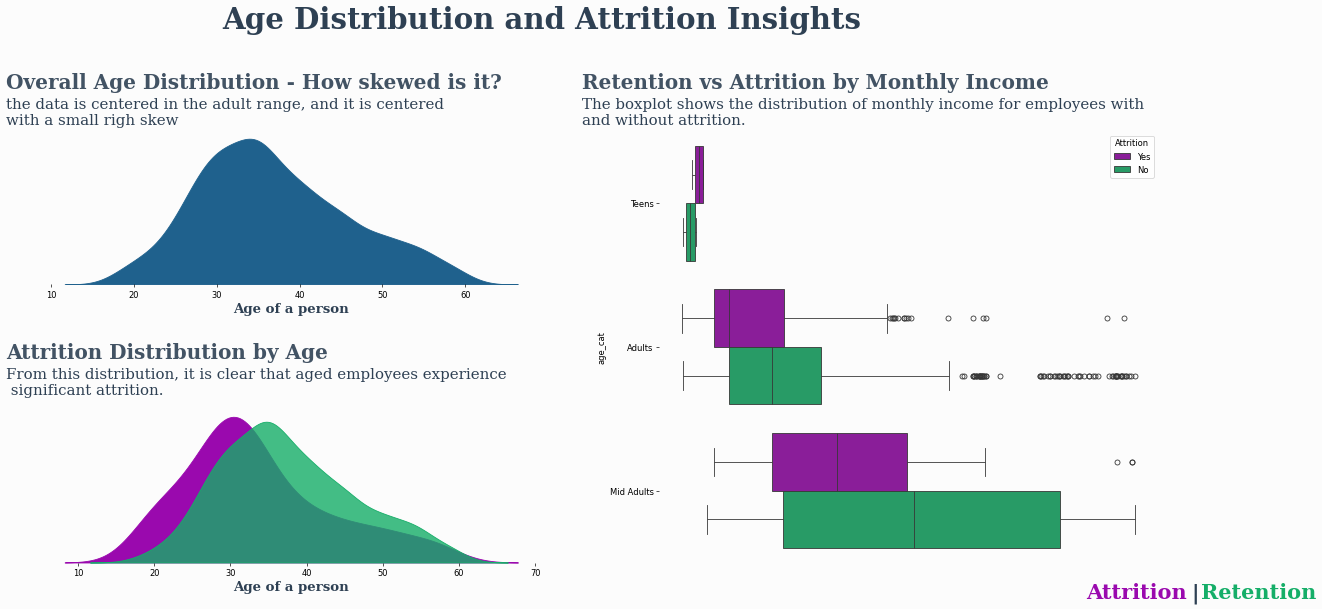

In [21]:

accent_color = '#1F618D'


fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:6, 0:11])
ax3 = fig.add_subplot(gs[10:15, 0:11])
ax1 = fig.add_subplot(gs[1:15, 13:])

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

sns.kdeplot(data=df, x='Age', ax=ax2, shade=True, alpha=1, color=accent_color)

sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='Age', ax=ax3, shade=True, alpha=1, color=attrition_color)
sns.kdeplot(data=df[df['Attrition'] == 'No'], x='Age', ax=ax3, shade=True, alpha=0.8, color=retention_color)

sns.boxplot(x=intt['MonthlyIncome'], y=intt['age_cat'], data=df, hue=df['Attrition'], ax=ax1, palette=[attrition_color, retention_color])


ax2.set_xlabel('Age of a person', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight':'bold'})
ax3.set_xlabel('Age of a person', fontdict={'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 16})

fig.text(0.25, 1, 'Age Distribution and Attrition Insights', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size':35})

fig.text(0.1, 0.9, 'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.84, 'the data is centered in the adult range, and it is centered \nwith a small righ skew',
         {'font':'Serif', 'size':'18', 'color': text_color})

fig.text(0.1, 0.45, 'Attrition Distribution by Age', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.1, 0.39, 'From this distribution, it is clear that aged employees experience\n significant attrition.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.5, 0.9, 'Retention vs Attrition by Monthly Income', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.5, 0.84, 'The boxplot shows the distribution of monthly income for employees with \nand without attrition.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.85, 0.05, 'Attrition', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': attrition_color})
fig.text(0.923, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.93, 0.05, 'Retention', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': retention_color})
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
fig.show()


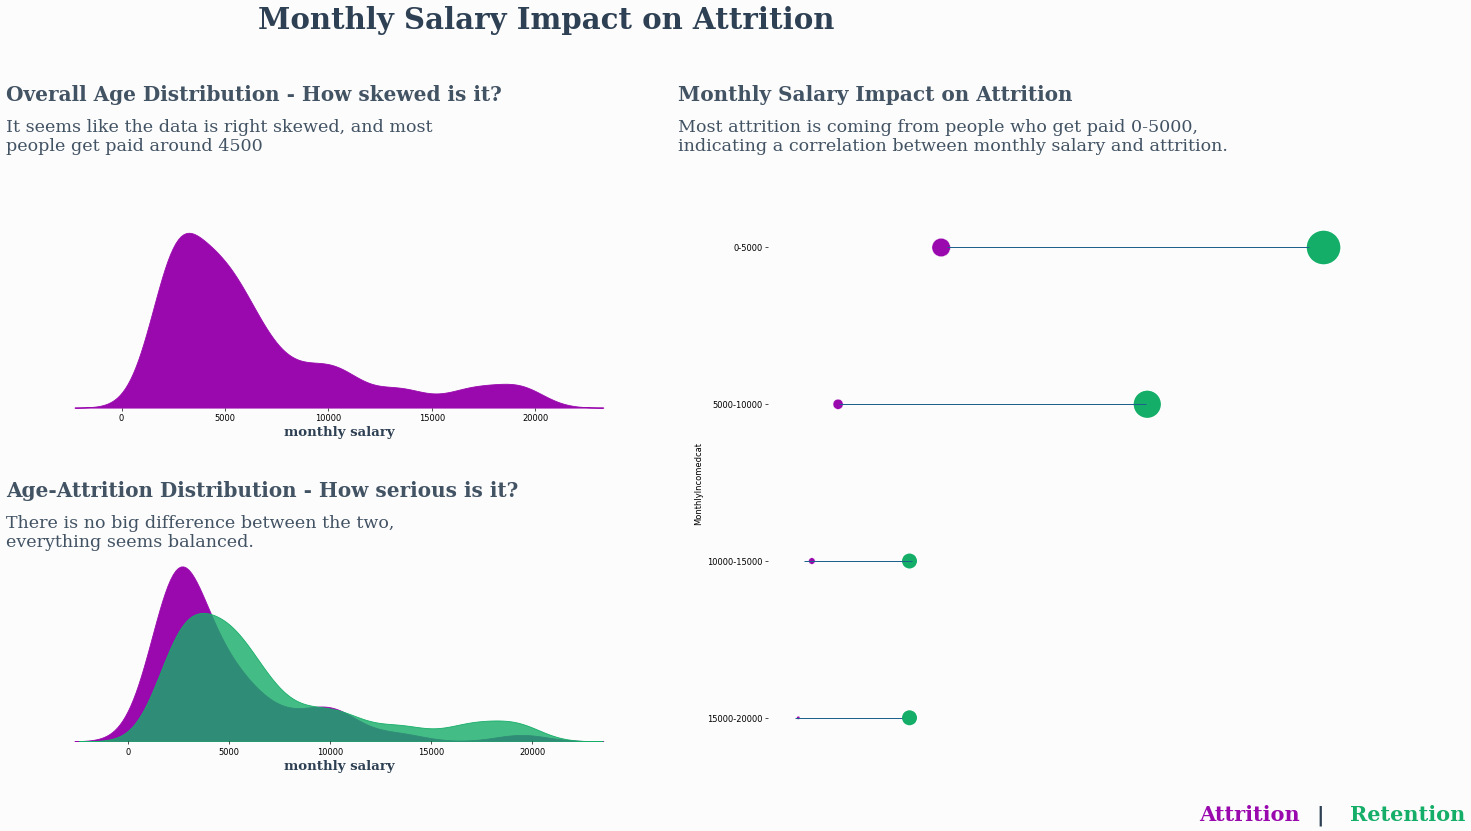

In [22]:

accent_color = '#1F618D'

fig = plt.figure(figsize=(28,12), dpi=60)  # Increased figure size for the dumbbell plot

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:6, 0:11])  # distribution plot
ax3 = fig.add_subplot(gs[10:15, 0:11])  # hue distribution plot
ax1 = fig.add_subplot(gs[1:15, 13:])  # dumbbell plot (expanded in size)

axes = [ax1, ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# distribution plots
sns.kdeplot(data=df, x='MonthlyIncome', ax=ax2, shade=True, alpha=1, color=attrition_color)
sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='MonthlyIncome', ax=ax3, shade=True, alpha=1, color=attrition_color)
sns.kdeplot(data=df[df['Attrition'] == 'No'], x='MonthlyIncome', ax=ax3, shade=True, alpha=0.8, color=retention_color)

ax2.set_xlabel('monthly salary', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight': 'bold'})

fig.text(0.1, 1., 'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.93, 'It seems like the data is right skewed, and most\npeople get paid around 4500', {'font':'Serif', 'color': text_color, 'size': 21}, alpha=0.9)

fig.text(0.5, 1, 'Monthly Salary Impact on Attrition', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.5, 0.93, 'Most attrition is coming from people who get paid 0-5000,\nindicating a correlation between monthly salary and attrition.', {'font':'Serif', 'color': text_color, 'size': 21}, alpha=0.9)

fig.text(0.1, 0.45, 'Age-Attrition Distribution - How serious is it?', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.38, 'There is no big difference between the two,\neverything seems balanced.', {'font':'Serif', 'color': text_color, 'size': 21}, alpha=0.9)

# Dumbbell plot with increased size
attrition_age = df[df['Attrition'] == 'Yes'].MonthlyIncomedcat.value_counts()
retention_age = df[df['Attrition'] == 'No'].MonthlyIncomedcat.value_counts()

ax1.hlines(y=['0-5000', '5000-10000', '10000-15000', '15000-20000'], xmin=[570, 390, 131, 120],
          xmax=[170, 50, 11, 1], color=accent_color, linewidth=1.2)  # Slightly thicker lines for better visibility

sns.scatterplot(y=attrition_age.index, x=attrition_age.values, s=attrition_age.values*3, color=attrition_color, ax=ax1, alpha=1)  # Increased size of dots
sns.scatterplot(y=retention_age.index, x=retention_age.values, s=retention_age.values*3, color=retention_color, ax=ax1, alpha=1)  # Increased size of dots

ax3.set_xlabel('monthly salary', fontdict={'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 16})

fig.text(0.81, 0, 'Attrition', {'font': 'Serif', 'weight':'bold', 'size': 25, 'style':'normal', 'color': attrition_color})
fig.text(0.88, 0, '|', {'font': 'Serif', 'weight':'bold', 'size': 25, 'style':'normal', 'color': text_color})
fig.text(0.9, 0, 'Retention', {'font': 'Serif', 'weight':'bold', 'size': 25, 'style':'normal', 'color': retention_color})
fig.text(0.25, 1.1, 'Monthly Salary Impact on Attrition', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 35})
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
fig.show()


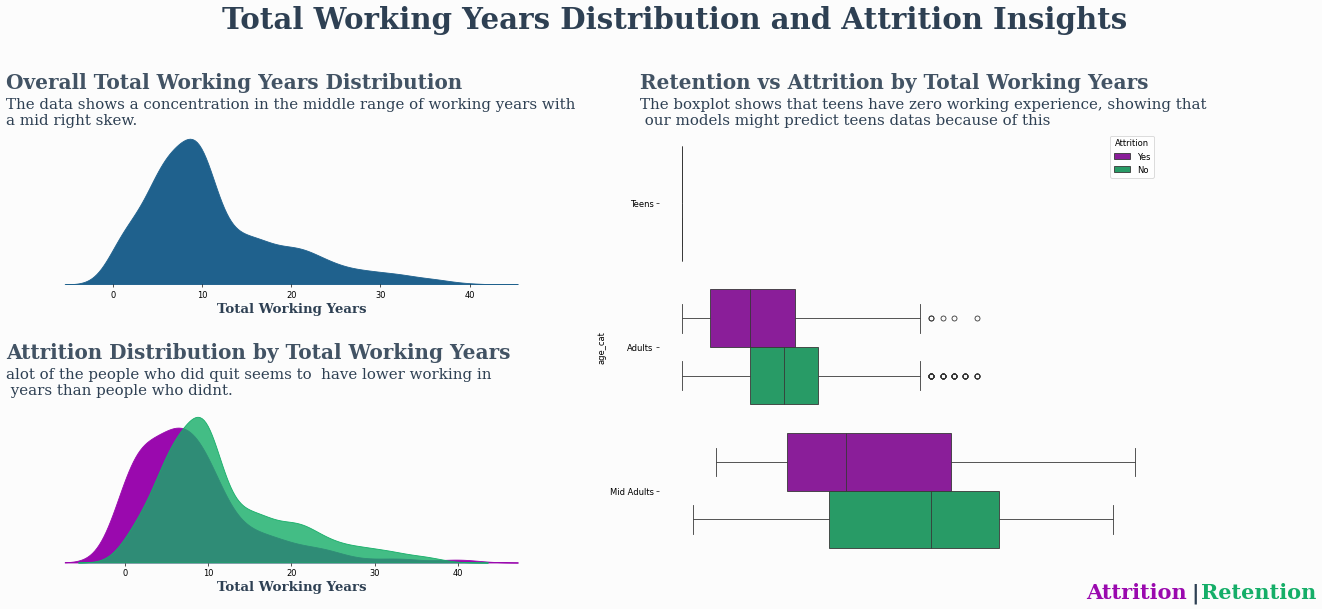

In [24]:

accent_color = '#1F618D'

fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:6, 0:11])  # Distribution plot
ax3 = fig.add_subplot(gs[10:15, 0:11])  # Hue distribution plot
ax1 = fig.add_subplot(gs[1:15, 13:])  # Box plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting axes; turning off visibility of axes and spines
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

sns.kdeplot(data=df, x='TotalWorkingYears', ax=ax2, shade=True, alpha=1, color=accent_color)

sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='TotalWorkingYears', ax=ax3, shade=True, alpha=1, color=attrition_color)
sns.kdeplot(data=df[df['Attrition'] == 'No'], x='TotalWorkingYears', ax=ax3, shade=True, alpha=0.8, color=retention_color)

sns.boxplot(x=intt['TotalWorkingYears'], y=intt['age_cat'], data=df, hue=df['Attrition'], ax=ax1, palette=[attrition_color, retention_color])


ax2.set_xlabel('Total Working Years', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight':'bold'})
ax3.set_xlabel('Total Working Years', fontdict={'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 16})

fig.text(0.25, 1, 'Total Working Years Distribution and Attrition Insights', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size':35})

fig.text(0.1, 0.9, 'Overall Total Working Years Distribution', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.84, 'The data shows a concentration in the middle range of working years with \na mid right skew.',
         {'font':'Serif', 'size':'18', 'color': text_color})

fig.text(0.1, 0.45, 'Attrition Distribution by Total Working Years', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.1, 0.39, 'alot of the people who did quit seems to  have lower working in\n years than people who didnt.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.54, 0.9, 'Retention vs Attrition by Total Working Years', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.54, 0.84, 'The boxplot shows that teens have zero working experience, showing that\n our models might predict teens datas because of this',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.85, 0.05, 'Attrition', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': attrition_color})
fig.text(0.923, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.93, 0.05, 'Retention', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': retention_color})
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
fig.show()


In [25]:
df['PerformanceRating']

0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

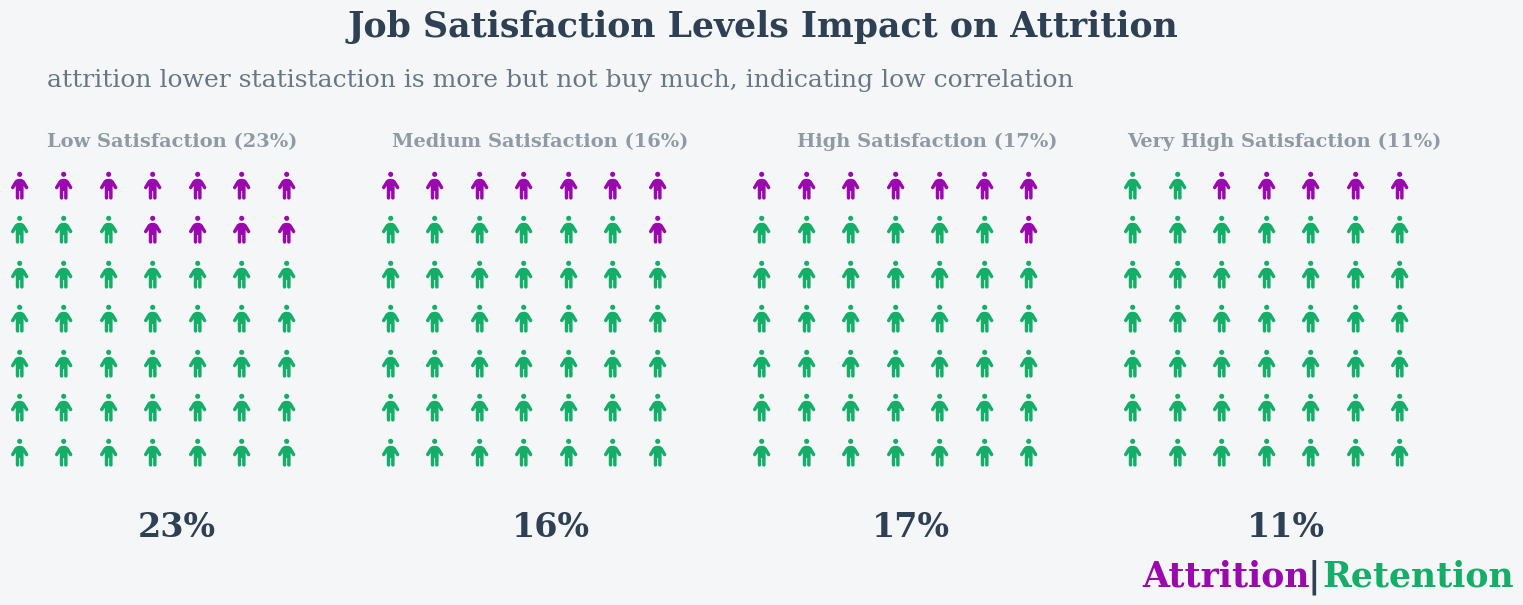

In [26]:
job_satisfaction = intt['JobSatisfaction'].value_counts()
attrition_job_satisfaction = intt[intt['Yes'] == 1]['JobSatisfaction'].value_counts()
Retention_job_satisfaction = intt[intt['Yes'] == 0]['JobSatisfaction'].value_counts()

low = job_satisfaction.get(1, 0)
medium = job_satisfaction.get(2, 0)
high = job_satisfaction.get(3, 0)
very_high = job_satisfaction.get(4, 0)

attrition_low = int(round(attrition_job_satisfaction.get(1, 0) / low * 100, 0))
attrition_medium = int(round(attrition_job_satisfaction.get(2, 0) / medium * 100, 0))
attrition_high = int(round(attrition_job_satisfaction.get(3, 0) / high * 100, 0))
attrition_very_high = int(round(attrition_job_satisfaction.get(4, 0) / very_high * 100, 0))

Retention_low = int(round(Retention_job_satisfaction.get(1, 0) / low * 100, 0))
Retention_medium = int(round(Retention_job_satisfaction.get(2, 0) / medium * 100, 0))
Retention_high = int(round(Retention_job_satisfaction.get(3, 0) / high * 100, 0))
Retention_very_high = int(round(Retention_job_satisfaction.get(4, 0) / very_high * 100, 0))

fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,
                 figsize=(15, 10),
                 facecolor='#F4F6F7',
                 dpi=100,
                 plots={
                     (3, 4, 1): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_low, Retention_low],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 4, 2): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_medium, Retention_medium],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 4, 3): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_high, Retention_high],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 4, 4): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_very_high, Retention_very_high],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.5,
                         'starting_location': 'NE'
                     }
                 }
                )

fig.text(0.25, 1.1, 'Job Satisfaction Levels Impact on Attrition',
         {'font': 'Serif', 'size': 25, 'color': text_color, 'weight': 'bold'})
fig.text(0.05, 1.05, 'attrition lower statistaction is more but not buy much, indicating low correlation',
         {'font': 'Serif', 'size': 18, 'color': text_color, 'weight': 'normal'}, alpha=0.7)
fig.text(0.11, 0.6, '{}%'.format(attrition_low), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.36, 0.6, '{}%'.format(attrition_medium), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.6, 0.6, '{}%'.format(attrition_high), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.85, 0.6, '{}%'.format(attrition_very_high), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)

fig.text(0.05, 0.99, 'Low Satisfaction ({}%)'.format(attrition_low),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.28, 0.99, 'Medium Satisfaction ({}%)'.format(attrition_medium),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.55, 0.99, 'High Satisfaction ({}%)'.format(attrition_high),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.77, 0.99, 'Very High Satisfaction ({}%)'.format(attrition_very_high),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)

fig.text(0.78, 0.55, 'Attrition', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': attrition_color})
fig.text(0.89, 0.55, '|', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': text_color})
fig.text(0.9, 0.55, 'Retention', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': retention_color})
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()


In [1]:
job_satisfaction = intt['JobLevel'].value_counts()
attrition_job_satisfaction = intt[intt['Yes'] == 1]['JobLevel'].value_counts()
Retention_job_satisfaction = intt[intt['Yes'] == 0]['JobLevel'].value_counts()

low = job_satisfaction.get(1, 0)
medium = job_satisfaction.get(2, 0)
high = job_satisfaction.get(3, 0)
very_high = job_satisfaction.get(4, 0)
very_very_high = job_satisfaction.get(4, 0)

attrition_low = int(round(attrition_job_satisfaction.get(1, 0) / low * 100, 0))
attrition_medium = int(round(attrition_job_satisfaction.get(2, 0) / medium * 100, 0))
attrition_high = int(round(attrition_job_satisfaction.get(3, 0) / high * 100, 0))
attrition_very_high = int(round(attrition_job_satisfaction.get(4, 0) / very_high * 100, 0))
attrition_very_very_high = int(round(attrition_job_satisfaction.get(4, 0) / very_very_high * 100, 0))

Retention_low = int(round(Retention_job_satisfaction.get(1, 0) / low * 100, 0))
Retention_medium = int(round(Retention_job_satisfaction.get(2, 0) / medium * 100, 0))
Retention_high = int(round(Retention_job_satisfaction.get(3, 0) / high * 100, 0))
Retention_very_high = int(round(Retention_job_satisfaction.get(4, 0) / very_high * 100, 0))
Retention_very_very_high = int(round(Retention_job_satisfaction.get(4, 0) / very_very_high * 100, 0))


fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,
                 figsize=(15, 10),
                 facecolor='#F4F6F7',
                 dpi=100,
                 plots={
                     (3, 5, 1): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_low, Retention_low],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 5, 2): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_medium, Retention_medium],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 5, 3): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_high, Retention_high],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 5, 4): {
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_very_high, Retention_very_high],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.5,
                         'starting_location': 'NE'
                     },
                     (3,5,5):{
                         'rows': 7,
                         'columns': 7,
                         'values': [attrition_very_very_high, Retention_very_very_high],
                         'colors': [attrition_color, retention_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.5,
                         'starting_location': 'NE'
                     }
                 }
                )

fig.text(0.25, 1.1, 'Online Boarding Impact on Satisfaction',
         {'font': 'Serif', 'size': 25, 'color': text_color, 'weight': 'bold'})
fig.text(0.05, 1.05, 'There is an apparent correlation that better online boarding service increases satisfaction levels.',
         {'font': 'Serif', 'size': 18, 'color': text_color, 'weight': 'normal'}, alpha=0.7)

# Satisfaction level percentages
fig.text(0.08, 0.6, '{}%'.format(satisied_Very_Poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.26, 0.6, '{}%'.format(satisied_poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.48, 0.6, '{}%'.format(satisied_average), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.68, 0.6, '{}%'.format(satisied_good), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.85, 0.6, '{}%'.format(satisied_Excellent), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)

# Satisfaction categories
fig.text(0.04, 0.99, 'Very Poor ({}%)'.format(satisied_Very_Poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.18, 0.99, 'Poor ({}%)'.format(satisied_poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.45, 0.99, 'Average ({}%)'.format(satisied_average),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.62, 0.99, 'Good ({}%)'.format(satisied_good),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.81, 0.99, 'Excellent ({}%)'.format(satisied_Excellent),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)

# Legend
fig.text(0.78, 0.55, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': satisfaction_color})
fig.text(0.893, 0.55, '|', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': text_color})
fig.text(0.9, 0.55, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': neutral_color})

plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'intt' is not defined

In [30]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

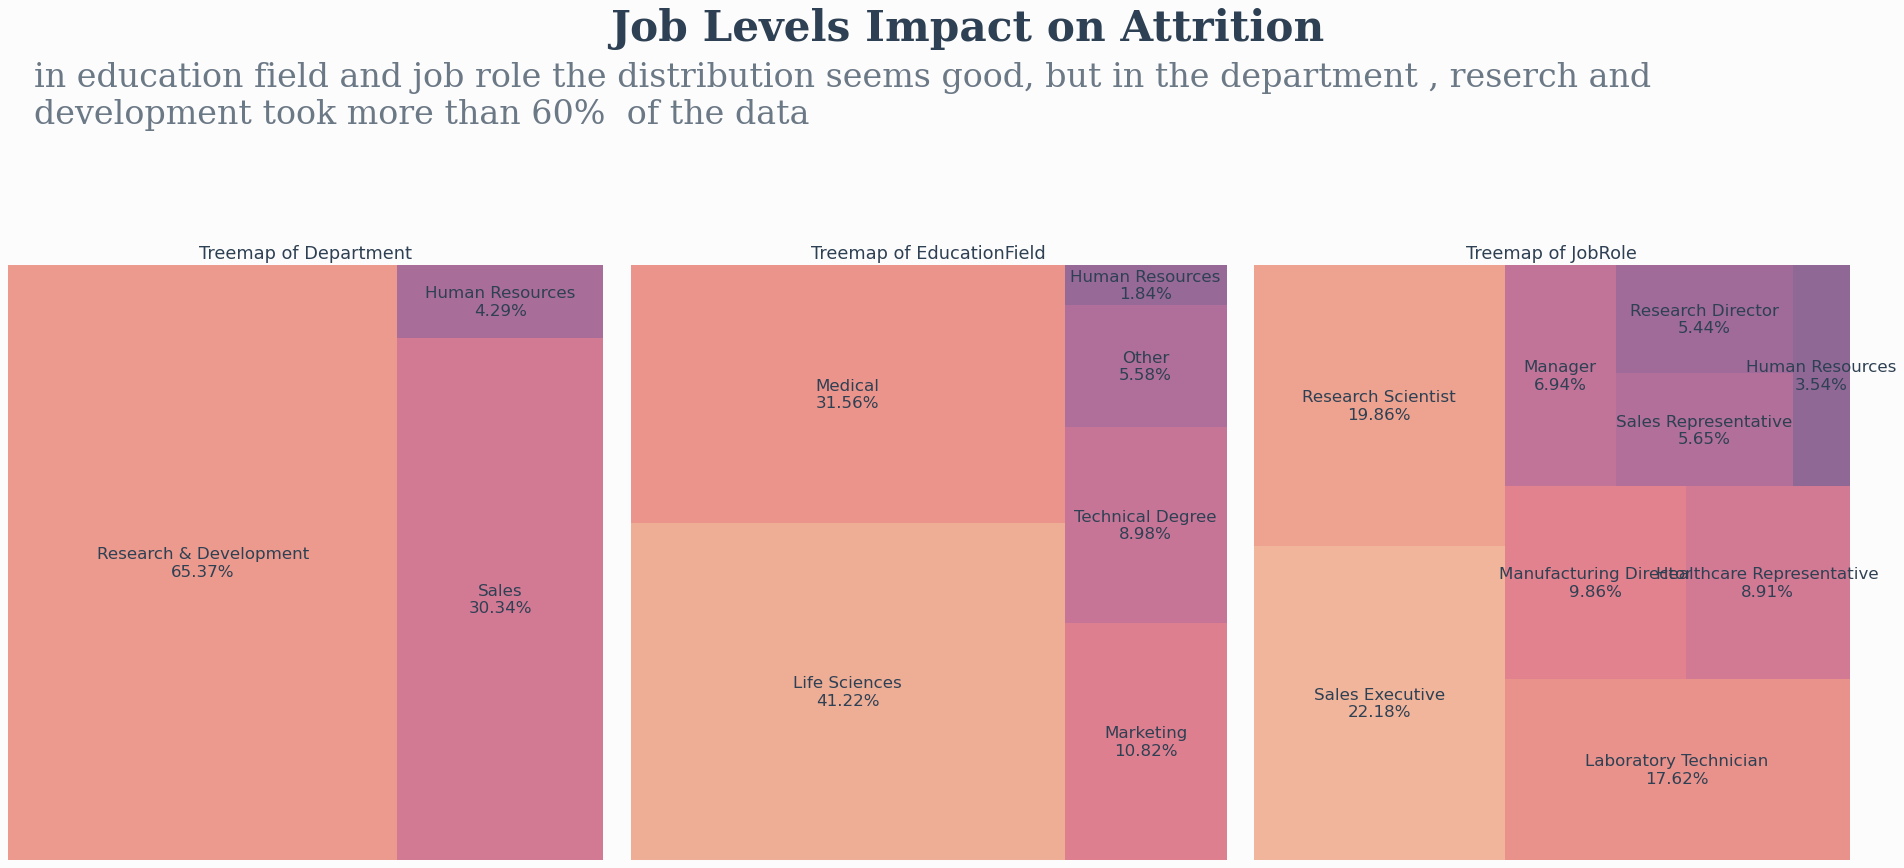

In [32]:
def generate_color_palette(n_colors):

    return sns.color_palette("flare", n_colors=n_colors)

def plot_treemap(column_name, ax, color_palette, text_color, background_color):
    counts = df[column_name].value_counts(normalize=True) * 100  # Get percentage
    labels = [f"{index}\n{value:.2f}%" for index, value in counts.items()]
    sizes = counts.values
    colors = color_palette[:len(labels)]

    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=ax, text_kwargs={'color': text_color,'size':'15'})
    ax.set_title(f'Treemap of {column_name}', fontsize=16, color=text_color)
    ax.set_facecolor(background_color)
    ax.axis('off')

fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=80)
fig.patch.set_facecolor(background_color)

for idx, column_name in enumerate(['Department', 'EducationField', 'JobRole']):
    num_categories = len(df[column_name].unique())
    color_palette = generate_color_palette(num_categories)
    plot_treemap(column_name, axes[idx], color_palette, text_color, background_color)

fig.text(0.32, 1.3, 'Job Levels Impact on Attrition', {'font': 'Serif', 'size': 38, 'color': text_color, 'weight': 'bold'})
fig.text(0.02, 1.17, 'in education field and job role the distribution seems good, but in the department , reserch and \ndevelopment took more than 60%  of the data', {'font': 'Serif', 'size': 30, 'color': text_color,'alpha':0.7})
plt.tight_layout()
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()


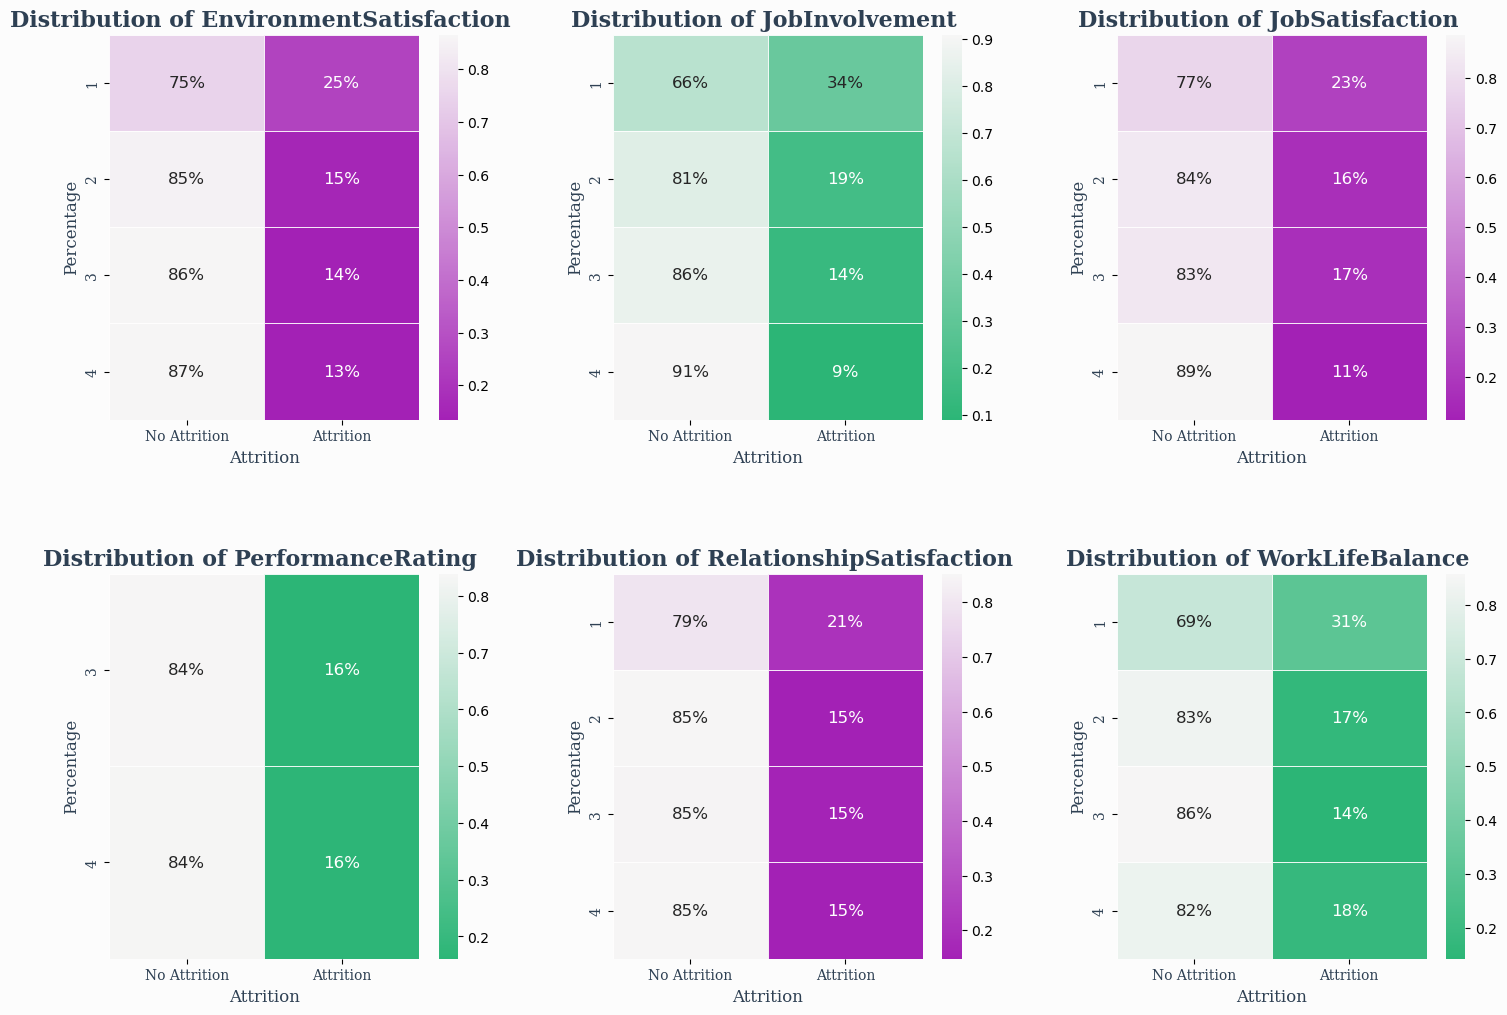

In [34]:
import matplotlib.colors

features = [
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'WorkLifeBalance'
]

fig = plt.figure(figsize=(18,12), dpi=100)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.4)

axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(3)]

col1 = [attrition_color, '#f6f5f5']
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = [retention_color, '#f6f5f5']
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2, N=256)

for i, feature in enumerate(features):
    ax = axes[i]
    crosstab = pd.crosstab(df[feature], df['Attrition'], normalize='index')
    sns.heatmap(ax=ax, data=crosstab, linewidths=0.5, cmap=colormap1 if i % 2 == 0 else colormap2,
                annot=True, fmt='1.0%', annot_kws={"fontsize":12}, alpha=0.9)

    ax.set_title(f'Distribution of {feature} ', fontdict={'font':'Serif', 'color': text_color, 'weight': 'bold', 'size': 16})
    ax.set_xlabel('Attrition', fontdict={'font':'Serif', 'color': text_color, 'size': 12})
    ax.set_ylabel('Percentage', fontdict={'font':'Serif', 'color': text_color, 'size': 12})

    ax.set_xticklabels(['No Attrition', 'Attrition'], fontdict={'font':'Serif', 'color': text_color, 'size': 10})
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'font':'Serif', 'color': text_color, 'size': 10})

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   object

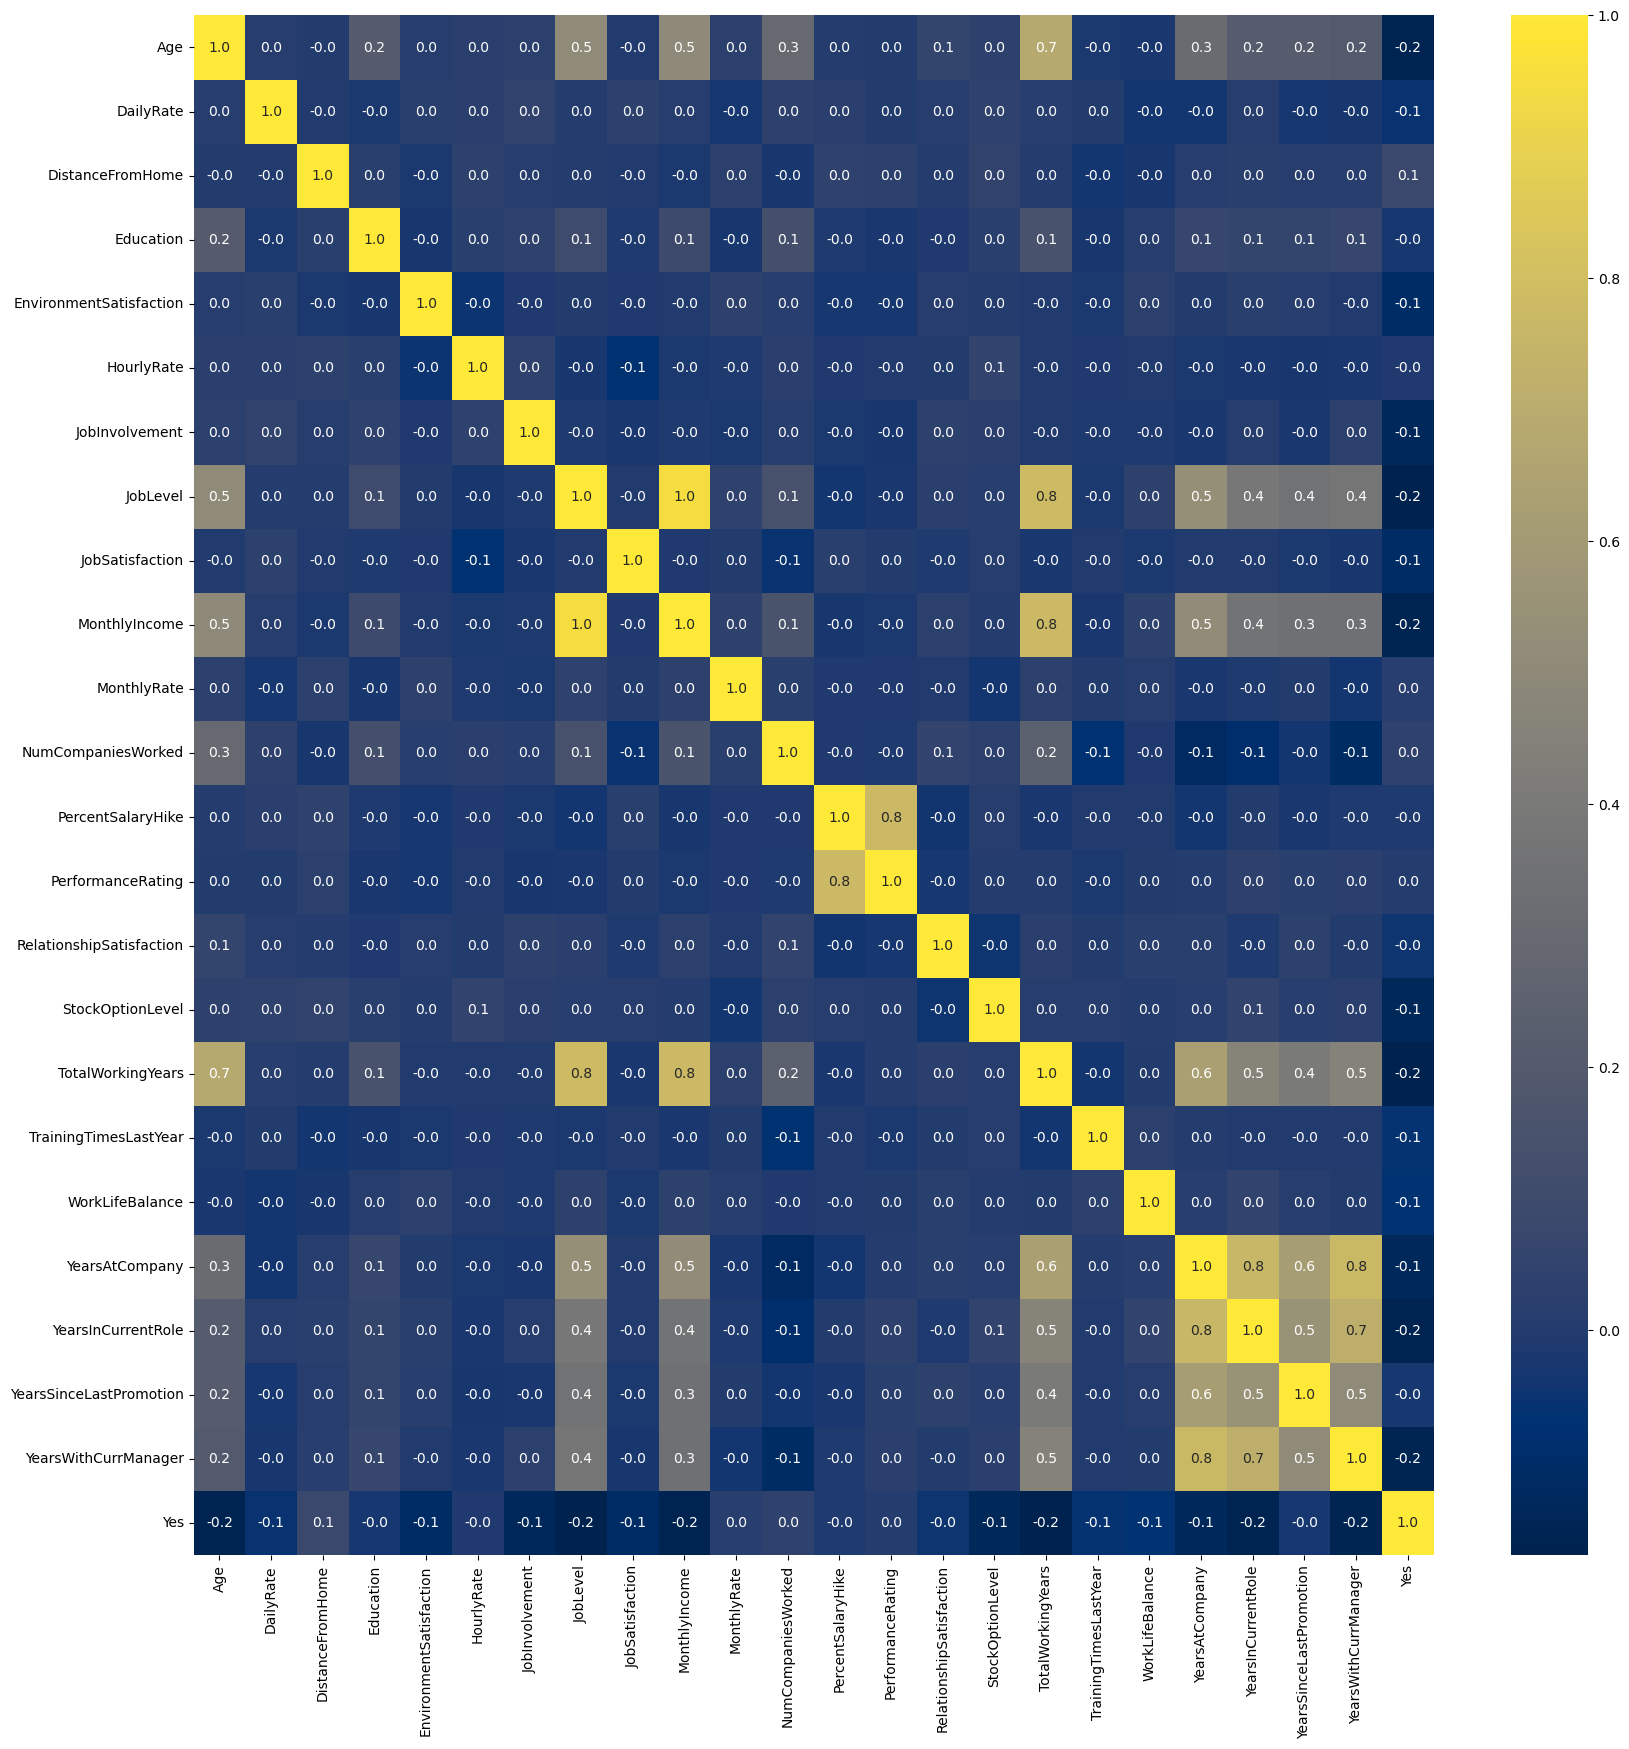

In [41]:
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
plt.figure(figsize=(20, 20))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True,cmap="cividis", fmt='.1f')
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()

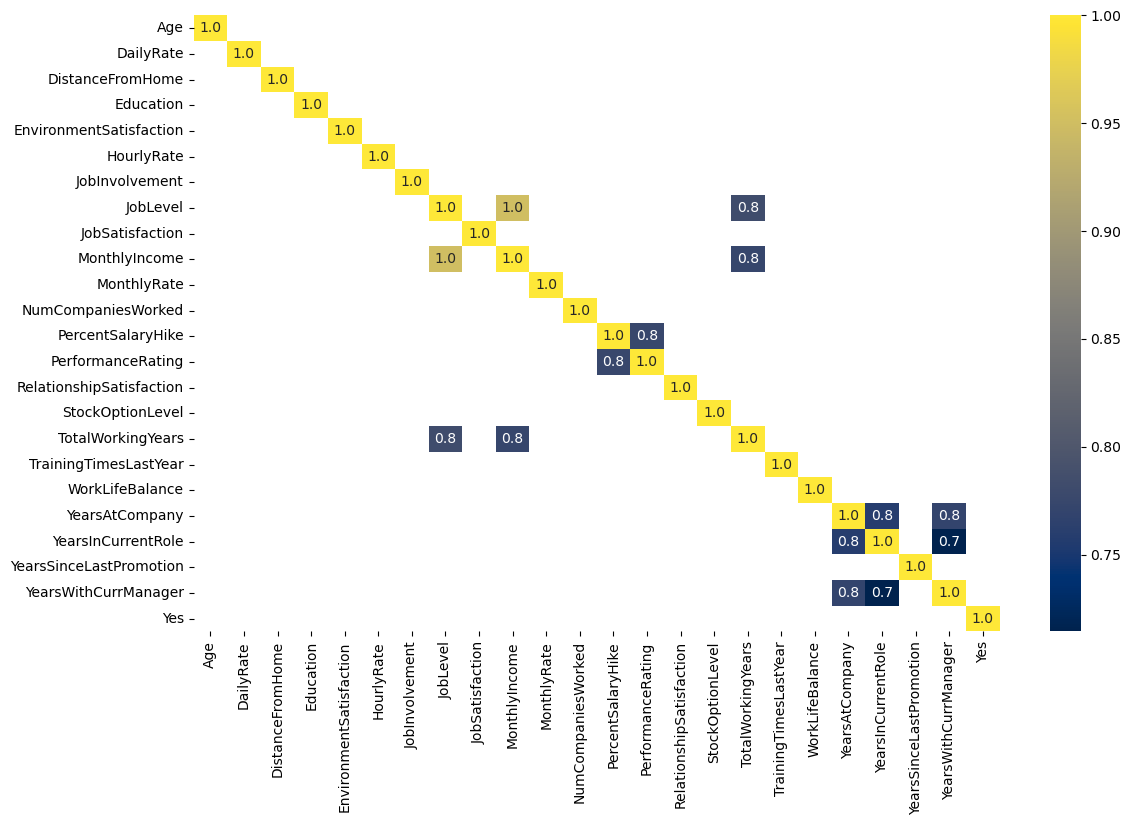

In [42]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize = (13,8))
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
sns.heatmap(filtered_corr_matrix, annot=True,cmap='cividis',fmt='.1f')
plt.savefig('plot11.png', dpi=300, bbox_inches='tight')
plt.show()
#

In [43]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Yes',
       'TotalWorkingYearscat', 'MonthlyIncomedcat'],
      dtype='object')

In [44]:
df=df.drop(['JobLevel','YearsAtCompany','YearsInCurrentRole','PerformanceRating','TotalWorkingYears'],axis=1)

In [45]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Yes', 'TotalWorkingYearscat', 'MonthlyIncomedcat'],
      dtype='object')

In [46]:
df['Income_JobSatisfaction'] = df['MonthlyIncome'] * df['JobSatisfaction']
df['JobRole_Department'] = df['JobRole'] + '_' + df['Department']


In [47]:
df['Income_JobSatisfaction']

0       23972
1       10260
2        6270
3        8727
4        6936
        ...  
1465    10284
1466     9991
1467    12284
1468    10780
1469    13212
Name: Income_JobSatisfaction, Length: 1470, dtype: int64

In [48]:
df = df.drop(['MonthlyIncome','JobSatisfaction','JobRole','Department'],axis=1)

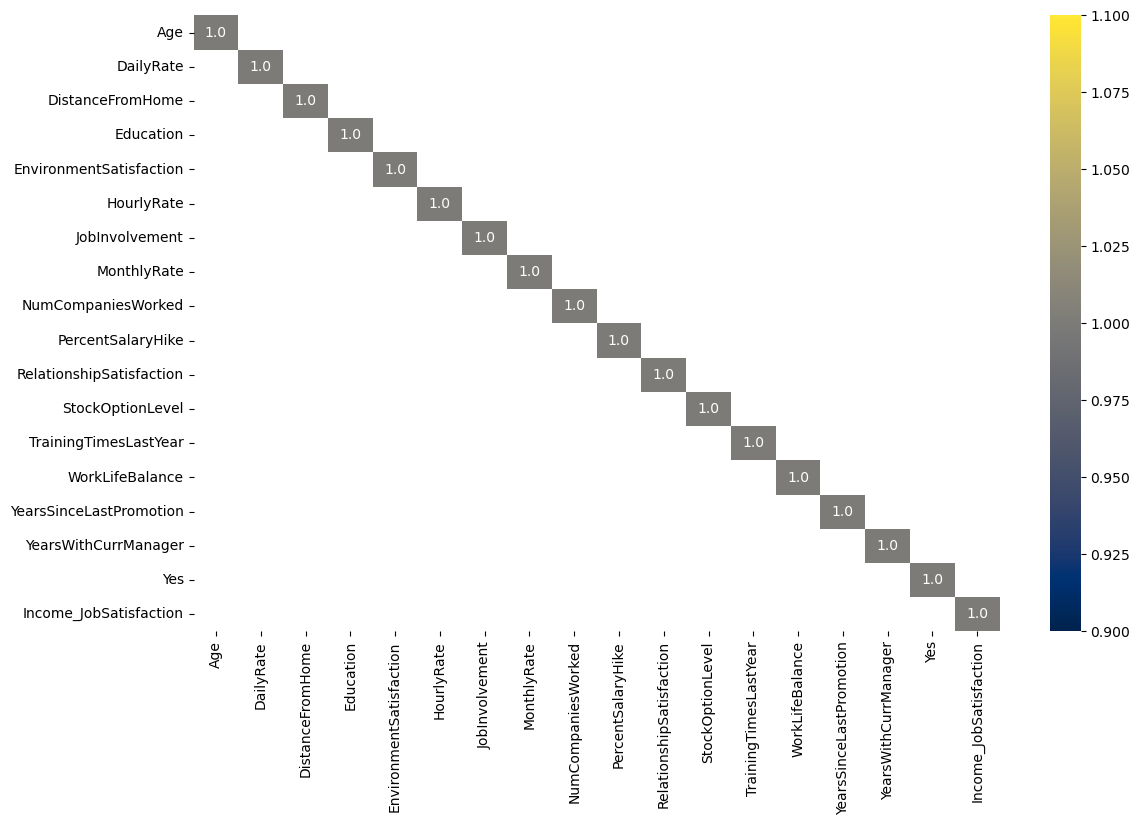

In [49]:
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize = (13,8))
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
sns.heatmap(filtered_corr_matrix, annot=True,cmap='cividis',fmt='.1f')
plt.savefig('plot12.png', dpi=300, bbox_inches='tight')
plt.show()
#

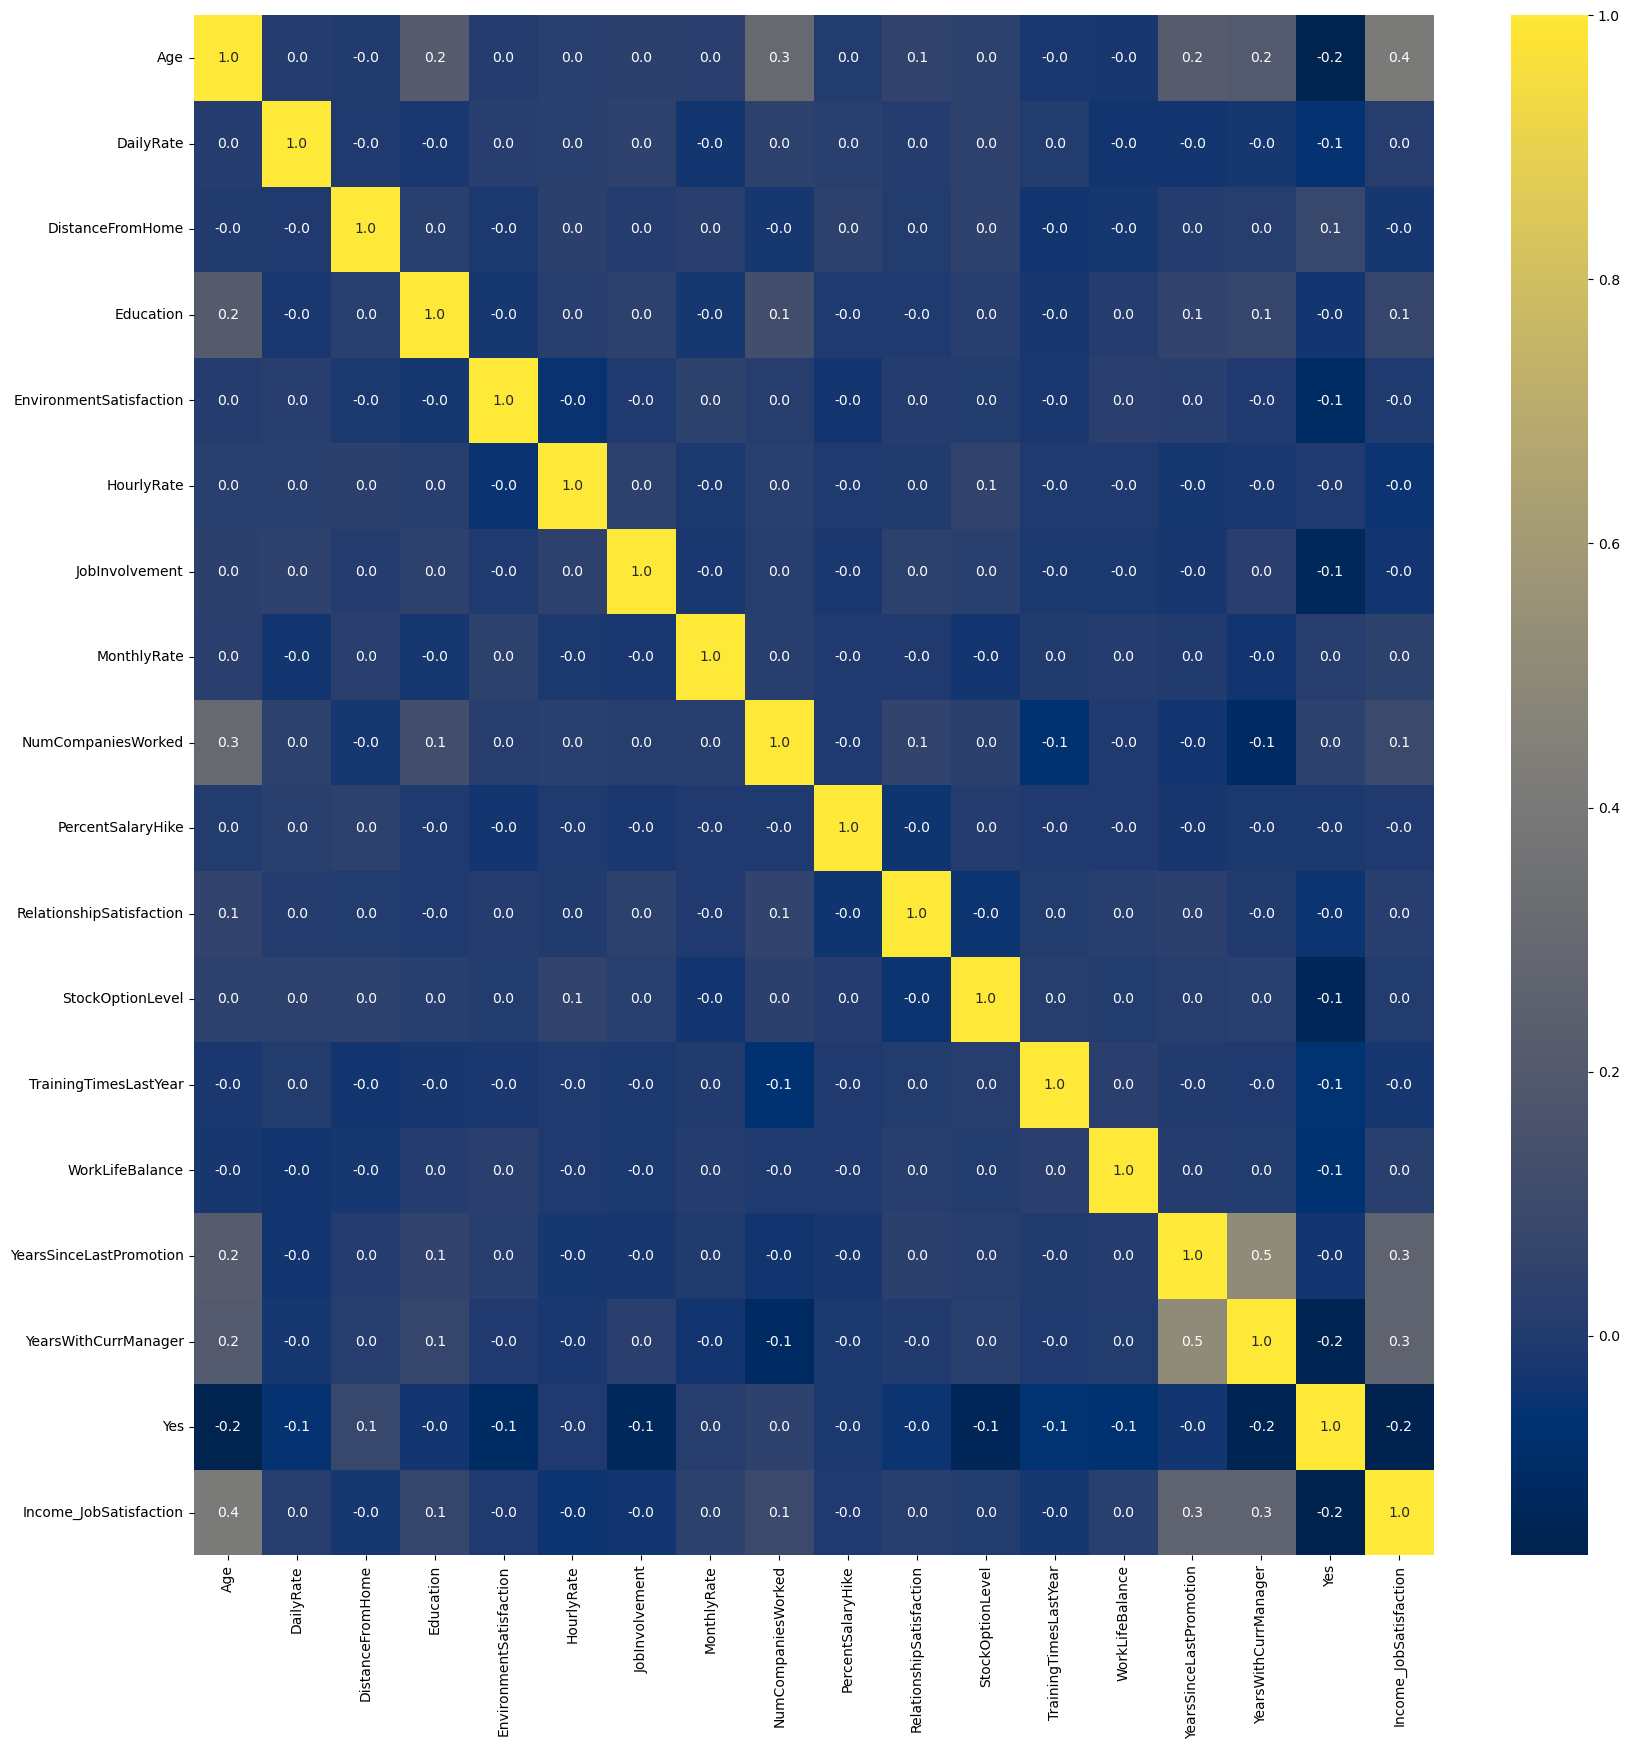

In [50]:
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

plt.figure(figsize=(20, 20))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.1f')
plt.savefig('plot13.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
df = pd.get_dummies(df, drop_first=True,dtype=int)

In [52]:
df = df.drop('Yes',axis=1)

In [53]:
df["Attrition_Yes"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: int32

# **Modeling**

In [55]:

# Sample Data Preparation (Replace with your dataset)
X = df.drop('Attrition_Yes', axis=1)  # Replace 'target' with your target column name
y = df['Attrition_Yes']  # Replace 'target' with your target column name

# Oversampling methods
oversamplers = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42)
}

# Plotting setup
fig, axes = plt.subplots(nrows=1, ncols=len(oversamplers) + 1, figsize=(24, 6))
fig.patch.set_facecolor('#F4F6F7')  # Light Gray for background

# Apply each oversampling method and plot PCA results
for i, (method_name, oversampler) in enumerate(oversamplers.items()):
    X_res, y_res = oversampler.fit_resample(X, y)

    # Standardize data
    scaler = StandardScaler()
    X_res = scaler.fit_transform(X_res)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_res)

    # Plot
    ax = axes[i]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='coolwarm', alpha=0.7)
    ax.set_title(f'{method_name} PCA')
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.grid(True)

    # Add legend
    handles, labels = scatter.legend_elements()
    ax.legend(handles, ['Class 0', 'Class 1'], loc='upper right')

# Plot original data for comparison
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

axes[-1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
axes[-1].set_title('Original Data PCA')
axes[-1].set_xlabel('PC 1')
axes[-1].set_ylabel('PC 2')
axes[-1].grid(True)
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, ['Class 0', 'Class 1'], loc='upper right')

plt.tight_layout()
plt.savefig('plot14.png', dpi=300, bbox_inches='tight')
plt.show()


In [56]:
from sklearn.model_selection import GridSearchCV
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

param_grids = {

    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5],
        'min_samples_split': [20],
        'min_samples_leaf': [5]
    },

    'Random Forest': {
    'n_estimators': [30, 40],
    'max_depth': [5, 8],
    'min_samples_split': [10, 15,20],
    'min_samples_leaf': [5, 8,15],
    'max_features': ['sqrt']
},

    'Gradient Boosting': {
    'n_estimators': [30, 40],
    'learning_rate': [0.01, 0.03],
    'max_depth': [3, 4],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [5, 8],
    'subsample': [0.8]
},
    'Logistic Regression': {
        'C': [0.58,0.59,0.5912,0.6,0.61],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 0.5, 1, 5,6],
        'gamma': [0.1, 0.01, 0.001,0.0012],
        'kernel': ['rbf']
    },
    'KNN': {
        'n_neighbors': [5],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}




scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

In [57]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Income_JobSatisfaction', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'TotalWorkingYearscat_10-20', 'TotalWorkingYearscat_20-30',
       'TotalWorkingYearscat_30-40', 'MonthlyIncomedcat_5000-10000',
       'MonthlyIncomedcat_10000-15000', 'MonthlyIncomedcat_15000-20000',
       'JobRole_Department_Human Resources_Human Resources',
    

In [58]:
df9 = df.copy()
X = df9.drop("Attrition_Yes",axis=1)
y = df9["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [59]:
from sklearn.metrics import classification_report, accuracy_score

best_models = {}
best_params = {}
best_scores = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)

    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")
    grid_search_results[model_name] = grid_search.cv_results_



Running GridSearchCV for Decision Tree: 
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0

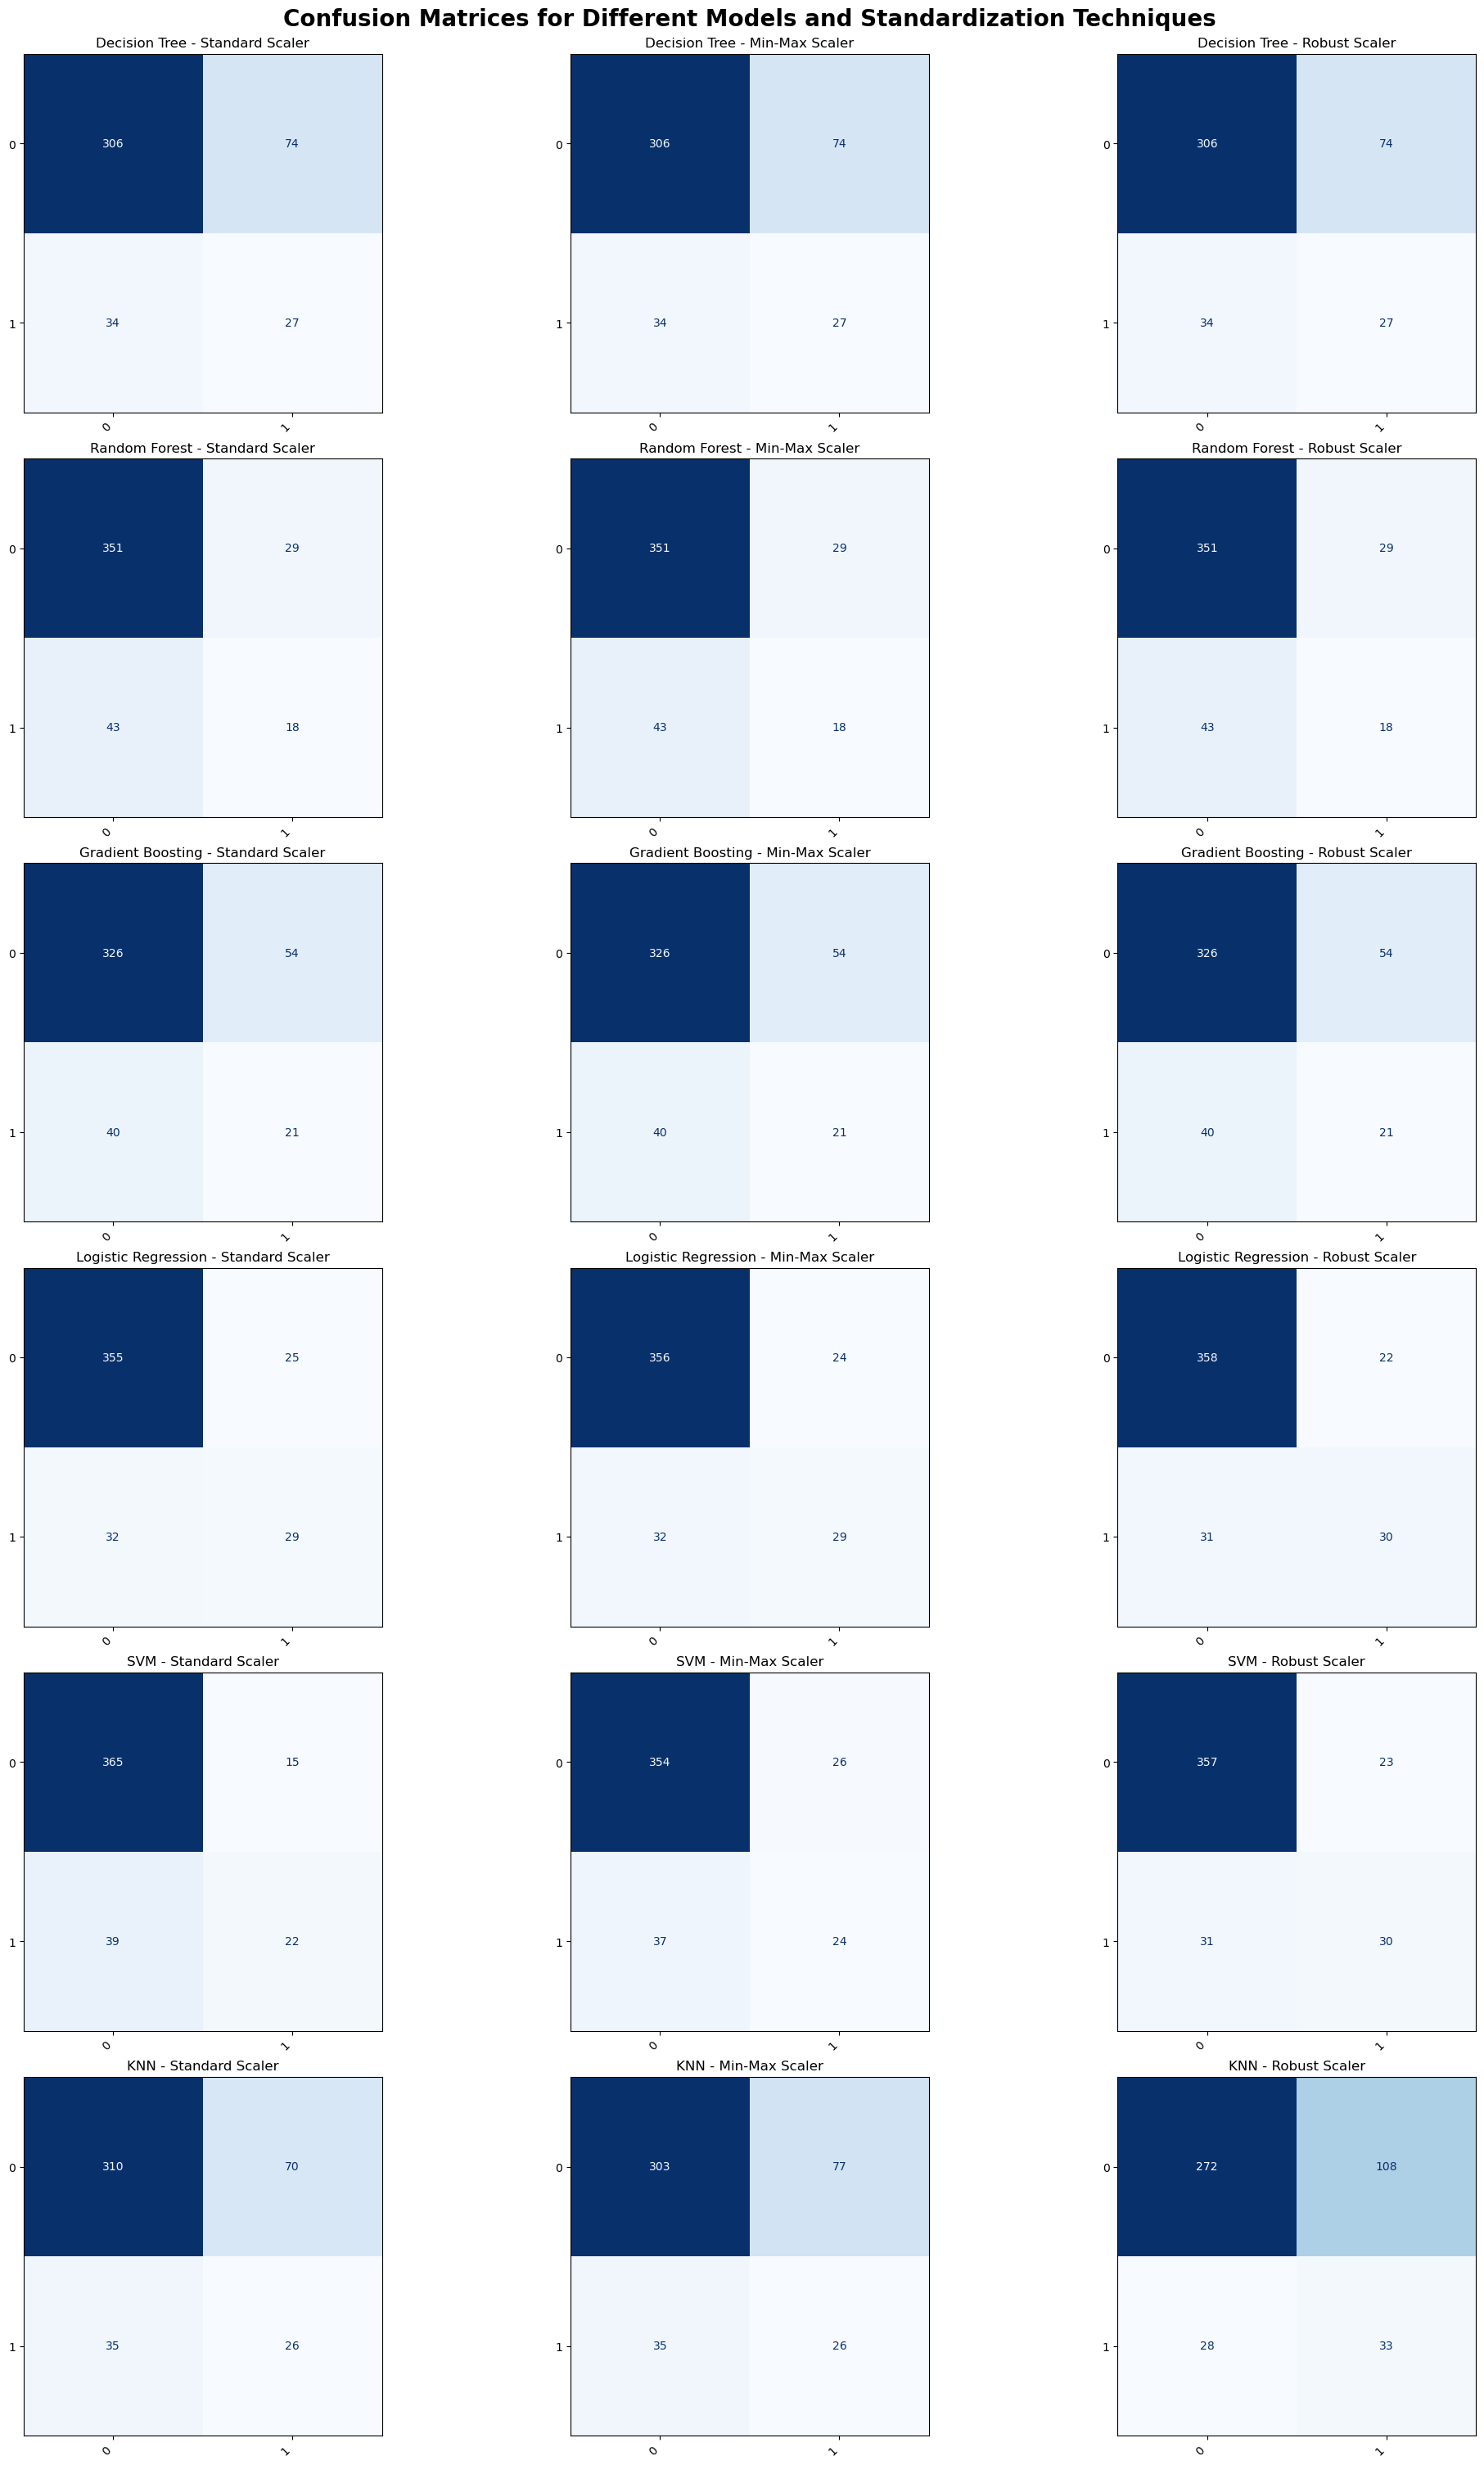

In [60]:
results_d = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, **best_params['Decision Tree']),
    'Random Forest': RandomForestClassifier(random_state=42, **best_params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **best_params['Gradient Boosting']),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params['Logistic Regression']),
    'SVM': SVC(**best_params['SVM']),
    'KNN': KNeighborsClassifier(**best_params['KNN'])
}


scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

results = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train_smote)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train_smote)

        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train_smote, model.predict(X_train_scaled))  # Accuracy on original train data
        test_acc = accuracy_score(y_test, y_test_pred)

        results_d["Model"].append(model_name)
        results_d["Scaler"].append(scaler_name)
        results_d["Train Accuracy"].append(train_acc)
        results_d["Test Accuracy"].append(test_acc)
        results[model_name][scaler_name]['y_true'] = y_test
        results[model_name][scaler_name]['y_pred'] = y_test_pred

# # Plot confusion matrices
num_models = len(models)
num_scalers = len(scalers)

fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

for i, (model_name, _) in enumerate(models.items()):
    for j, (scaler_name, _) in enumerate(scalers.items()):
         ax = axes[i, j]
         y_test = results[model_name][scaler_name]['y_true']
         y_pred = results[model_name][scaler_name]['y_pred']

         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

         ax.set_title(f'{model_name} - {scaler_name}')
         ax.set_xlabel('')
         ax.set_ylabel('')
         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# # Adjust layout
plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=20, weight='bold')
plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
results_df = pd.DataFrame(results_d)
results_df

NameError: name 'pd' is not defined

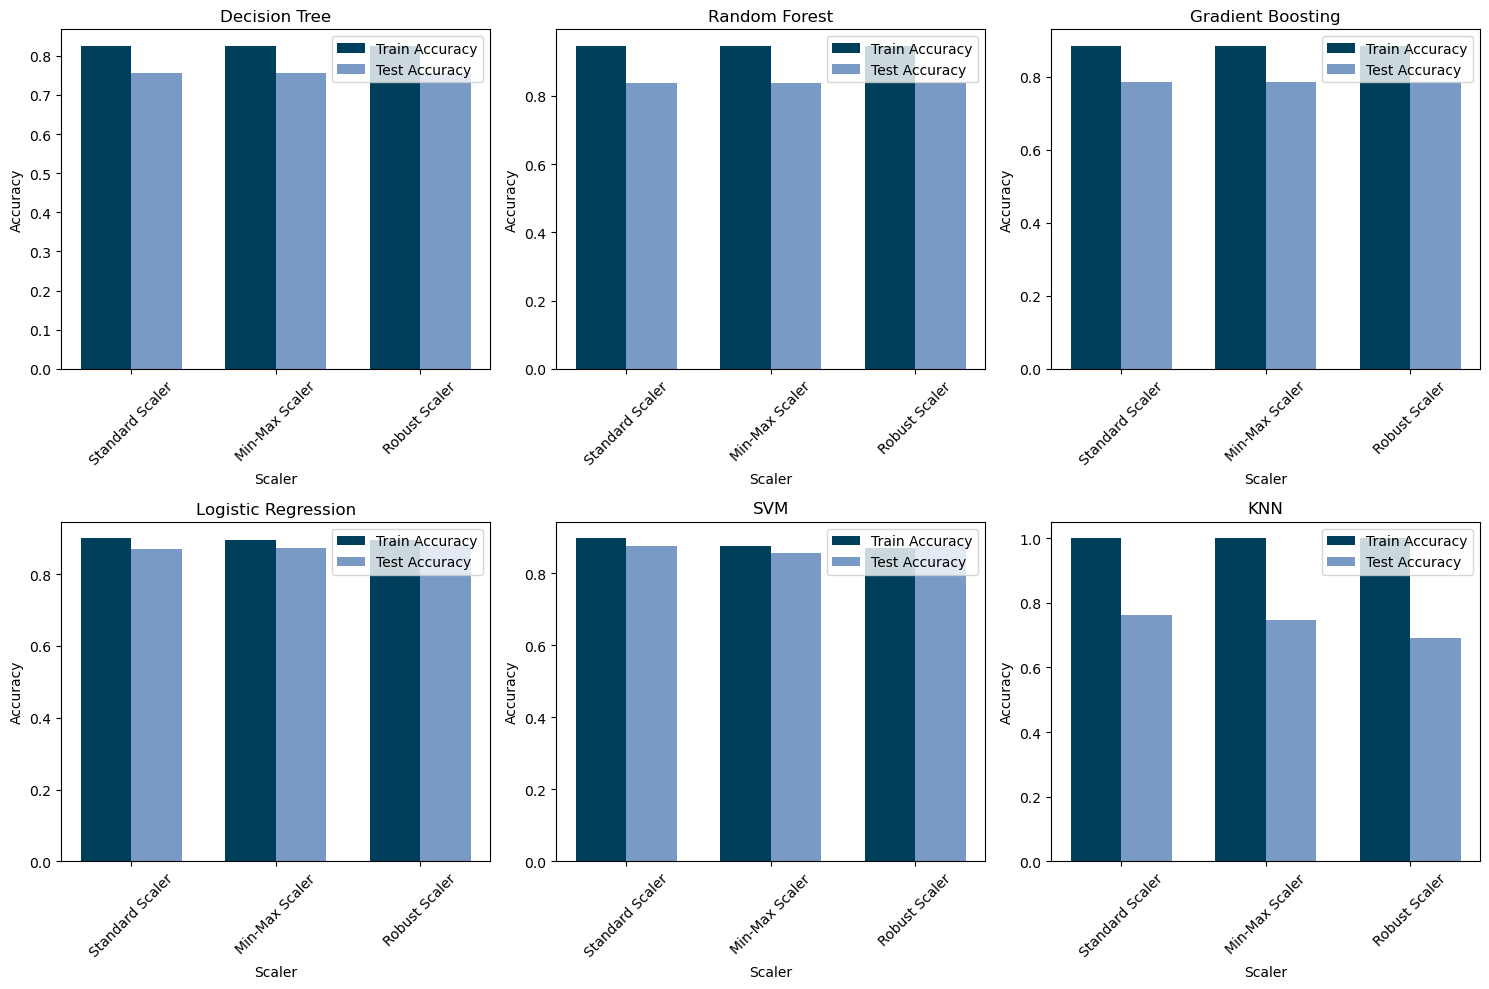

In [62]:
fig_width = 15
fig_height = 10
models = results_df['Model'].unique()
n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), tight_layout=True)

axes = axes.flatten()



train_color = '#003f5c'
test_color = '#7a9ac6'

for ax, model in zip(axes, models):
    model_df = results_df[results_df['Model'] == model]

    scalers = model_df['Scaler']
    bar_width = 0.35
    index = np.arange(len(scalers))

    ax.bar(index - bar_width/2, model_df['Train Accuracy'], bar_width, label='Train Accuracy', color=train_color)

    ax.bar(index + bar_width/2, model_df['Test Accuracy'], bar_width, label='Test Accuracy', color=test_color)

    ax.set_xlabel('Scaler')
    ax.set_ylabel('Accuracy')
    ax.set_title(model)
    ax.set_xticks(index)
    ax.set_xticklabels(scalers, rotation=45)
    ax.legend()

# Remove any unused subplots
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

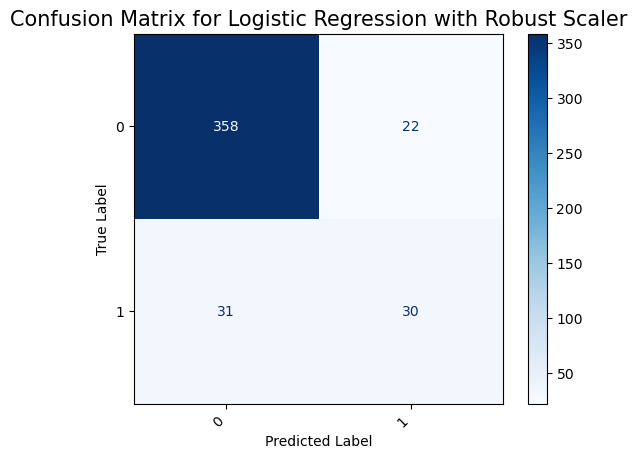

In [63]:
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(C=0.58,penalty='l1',solver='liblinear' ,max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Logistic Regression with Robust Scaler', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('logistic_robust_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [64]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93       380
     Class 1       0.58      0.49      0.53        61

    accuracy                           0.88       441
   macro avg       0.75      0.72      0.73       441
weighted avg       0.87      0.88      0.88       441



In [66]:
from sklearn.ensemble import RandomForestClassifier
df10 = df.copy()
X = df10.drop("Attrition_Yes",axis=1)
y = df10["Attrition_Yes"]
X = df_feat.drop(columns=['Attrition_Yes'])
y = df_feat['Attrition_Yes']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)



In [67]:
importance_df


Feature  Importance
9                       MonthlyIncome    0.072600
0                                 Age    0.060495
1                           DailyRate    0.054831
43                       OverTime_Yes    0.050067
16                  TotalWorkingYears    0.048431
2                    DistanceFromHome    0.046774
10                        MonthlyRate    0.044826
19                     YearsAtCompany    0.043154
5                          HourlyRate    0.042656
12                  PercentSalaryHike    0.033769
11                 NumCompaniesWorked    0.033486
22               YearsWithCurrManager    0.032170
4             EnvironmentSatisfaction    0.031788
15                   StockOptionLevel    0.028715
17              TrainingTimesLastYear    0.026743
8                     JobSatisfaction    0.026075
14           RelationshipSatisfaction    0.025317
20                 YearsInCurrentRole    0.025154
18                    WorkLifeBalance    0.025045
6                      JobInvolvement    0.024568
21            YearsSinceLastPromotion    0.023428
7                            JobLevel    0.022808
3                           Education    0.019688
42               MaritalStatus_Single    0.017811
23   BusinessTravel_Travel_Frequently    0.014648
25  Department_Research & Development    0.010459
32                        Gender_Male    0.009564
34      JobRole_Laboratory Technician    0.009413
29             EducationField_Medical    0.009086
40       JobRole_Sales Representative    0.009056
26                   Department_Sales    0.008000
24       BusinessTravel_Travel_Rarely    0.007776
28           EducationField_Marketing    0.007701
31    EducationField_Technical Degree    0.007631
27       EducationField_Life Sciences    0.007570
41              MaritalStatus_Married    0.007339
39            JobRole_Sales Executive    0.007301
38         JobRole_Research Scientist    0.007104
13                  PerformanceRating    0.005975
33            JobRole_Human Resources    0.003083
36     JobRole_Manufacturing Director    0.002834
30               EducationField_Other    0.002641
35                    JobRole_Manager    0.001647
37          JobRole_Research Director    0.000771

In [68]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Income_JobSatisfaction', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'TotalWorkingYearscat_10-20', 'TotalWorkingYearscat_20-30',
       'TotalWorkingYearscat_30-40', 'MonthlyIncomedcat_5000-10000',
       'MonthlyIncomedcat_10000-15000', 'MonthlyIncomedcat_15000-20000',
       'JobRole_Department_Human Resources_Human Resources',
    

In [69]:
df11 = df.copy()

In [70]:
columns_to_keep = [
    "MonthlyIncome", "Age", "DailyRate", "OverTime_Yes", "TotalWorkingYears",
    "DistanceFromHome", "MonthlyRate", "YearsAtCompany", "HourlyRate", "PercentSalaryHike",
    "NumCompaniesWorked", "YearsWithCurrManager", "EnvironmentSatisfaction", "StockOptionLevel",
    "TrainingTimesLastYear", "JobSatisfaction", "RelationshipSatisfaction", "YearsInCurrentRole",
    "WorkLifeBalance", "JobInvolvement", "YearsSinceLastPromotion", "JobLevel", "Education",
    "MaritalStatus_Single", "BusinessTravel_Travel_Frequently", "Department_Research & Development",
    "Gender_Male", "JobRole_Laboratory Technician", "EducationField_Medical", "JobRole_Sales Representative","Attrition_Yes"
]

existing_columns = [col for col in columns_to_keep if col in df11.columns]
df_subset = df[existing_columns]
df_subset.head()

Age  DailyRate  OverTime_Yes  DistanceFromHome  MonthlyRate  HourlyRate  \
0   41       1102             1                 1        19479          94   
1   49        279             0                 8        24907          61   
2   37       1373             1                 2         2396          92   
3   33       1392             1                 3        23159          56   
4   27        591             0                 2        16632          40   

   PercentSalaryHike  NumCompaniesWorked  YearsWithCurrManager  \
0                 11                   8                     5   
1                 23                   1                     7   
2                 15                   6                     0   
3                 11                   1                     0   
4                 12                   9                     2   

   EnvironmentSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                        2                 0                      0   
1                        3                 1                      3   
2                        4                 0                      3   
3                        4                 0                      3   
4                        1                 1                      3   

   RelationshipSatisfaction  WorkLifeBalance  JobInvolvement  \
0                         1                1               3   
1                         4                3               2   
2                         2                3               2   
3                         3                3               3   
4                         4                3               3   

   YearsSinceLastPromotion  Education  MaritalStatus_Single  \
0                        0          2                     1   
1                        1          1                     0   
2                        0          2                     1   
3                        3          4                     0   
4                        2          1                     0   

   BusinessTravel_Travel_Frequently  Gender_Male  EducationField_Medical  \
0                                 0            0                       0   
1                                 1            1                       0   
2                                 0            1                       0   
3                                 1            0                       0   
4                                 0            1                       1   

   Attrition_Yes  
0              1  
1              0  
2              1  
3              0  
4              0

In [71]:
df12 = df_subset.copy()
X = df12.drop("Attrition_Yes",axis=1)
y = df12["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
from sklearn.model_selection import GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None]
    },
}

best_models = {}
best_params = {}
best_scores = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)

    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")
    grid_search_results[model_name] = grid_search.cv_results_




Running GridSearchCV for Logistic Regression: 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[C

***Apply on the most important features***

In [74]:
from sklearn.feature_selection import RFECV
# el library deh bt2ol ahsan kam features w homa ehh
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['Age', 'DailyRate', 'OverTime_Yes', 'DistanceFromHome', 'MonthlyRate',
       'HourlyRate', 'PercentSalaryHike', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion'],
      dtype='object')


In [75]:
optimal_df= df12[['Age', 'DailyRate', 'OverTime_Yes', 'DistanceFromHome', 'MonthlyRate',
       'HourlyRate', 'PercentSalaryHike', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion','Attrition_Yes']]


In [76]:
optimal_df.head()

Age  DailyRate  OverTime_Yes  DistanceFromHome  MonthlyRate  HourlyRate  \
0   41       1102             1                 1        19479          94   
1   49        279             0                 8        24907          61   
2   37       1373             1                 2         2396          92   
3   33       1392             1                 3        23159          56   
4   27        591             0                 2        16632          40   

   PercentSalaryHike  NumCompaniesWorked  YearsWithCurrManager  \
0                 11                   8                     5   
1                 23                   1                     7   
2                 15                   6                     0   
3                 11                   1                     0   
4                 12                   9                     2   

   EnvironmentSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                        2                 0                      0   
1                        3                 1                      3   
2                        4                 0                      3   
3                        4                 0                      3   
4                        1                 1                      3   

   YearsSinceLastPromotion  Attrition_Yes  
0                        0              1  
1                        1              0  
2                        0              1  
3                        3              0  
4                        2              0

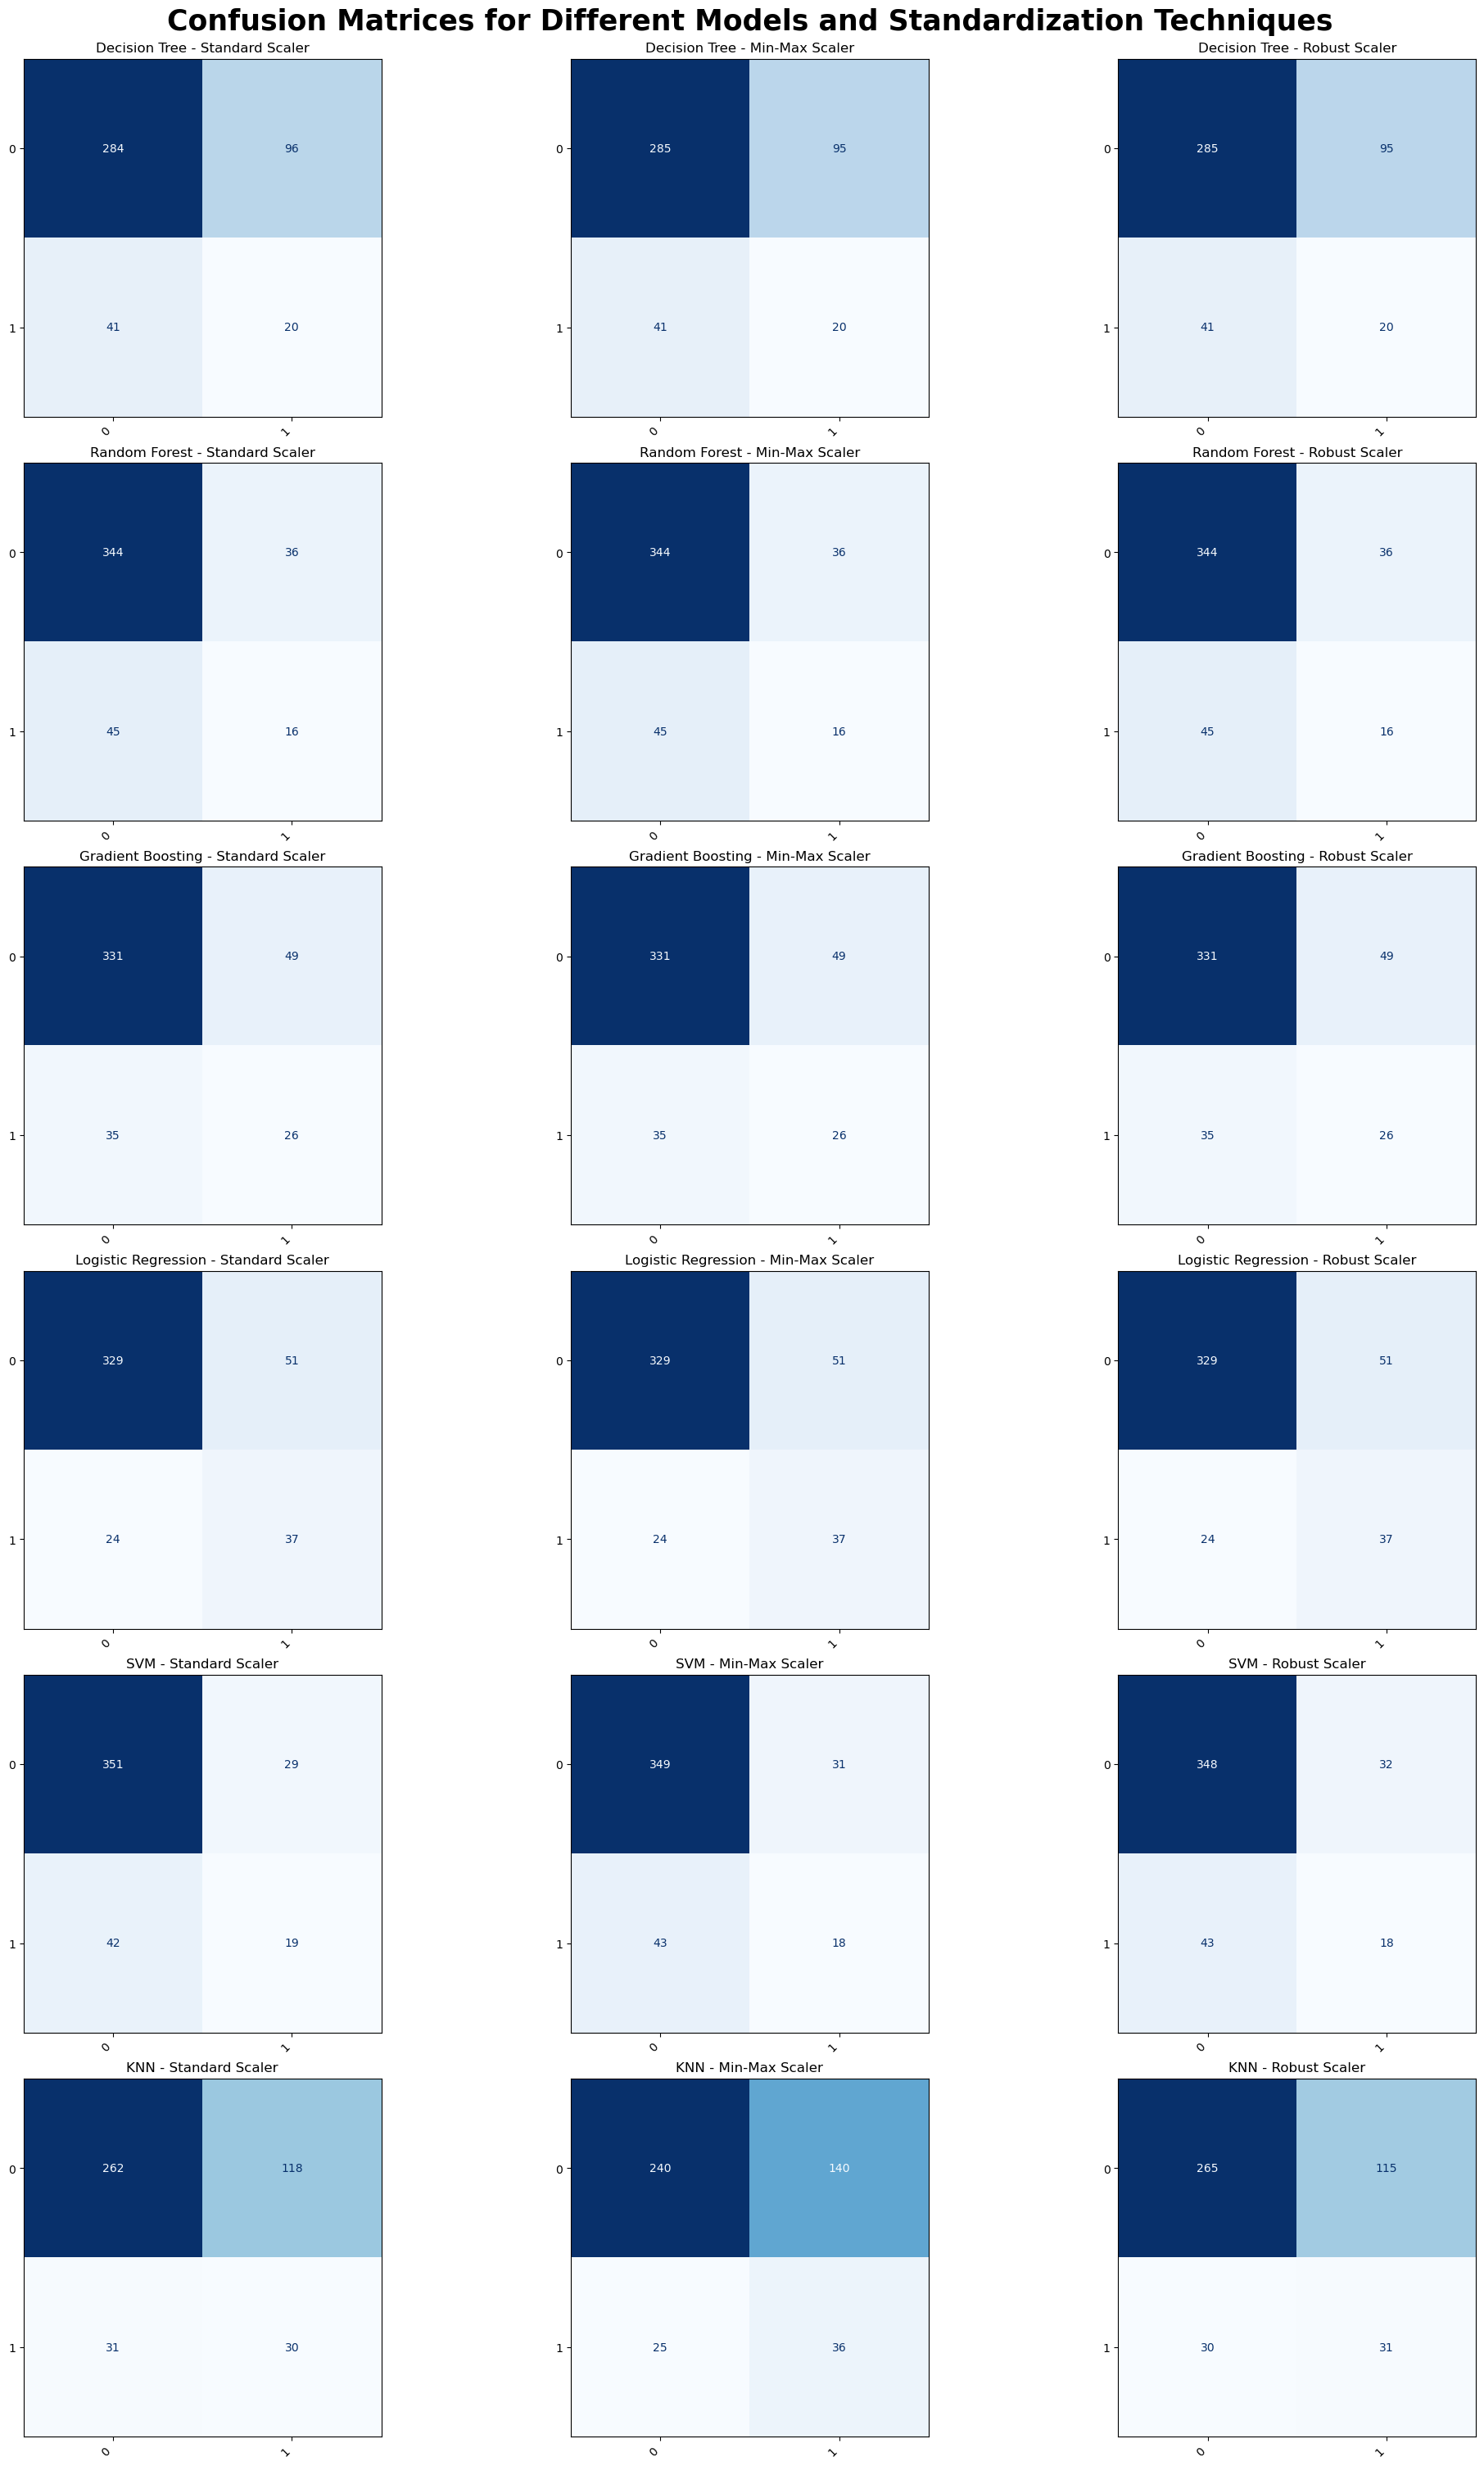

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize dictionaries to store results
results_d1 = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, **best_params.get('Decision Tree', {})),
    'Random Forest': RandomForestClassifier(random_state=42, **best_params.get('Random Forest', {})),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **best_params.get('Gradient Boosting', {})),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params.get('Logistic Regression', {})),
    'SVM': SVC(**best_params.get('SVM', {})),
    'KNN': KNeighborsClassifier(**best_params.get('KNN', {}))
}

scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

results1 = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train_smote)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train_smote)

        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train_smote, model.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, y_test_pred)

        results_d1["Model"].append(model_name)
        results_d1["Scaler"].append(scaler_name)
        results_d1["Train Accuracy"].append(train_acc)
        results_d1["Test Accuracy"].append(test_acc)
        results1[model_name][scaler_name]['y_true'] = y_test
        results1[model_name][scaler_name]['y_pred'] = y_test_pred

# Plot confusion matrices
num_models = len(models)
num_scalers = len(scalers)

fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

for i, (model_name, _) in enumerate(models.items()):
    for j, (scaler_name, _) in enumerate(scalers.items()):
         ax = axes[i, j]
         y_test = results1[model_name][scaler_name]['y_true']
         y_pred = results1[model_name][scaler_name]['y_pred']

         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

         ax.set_title(f'{model_name} - {scaler_name}')
         ax.set_xlabel('')
         ax.set_ylabel('')
         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=25, weight='bold')
plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
plt.show()


In [78]:
optimal_df.head()

Age  DailyRate  OverTime_Yes  DistanceFromHome  MonthlyRate  HourlyRate  \
0   41       1102             1                 1        19479          94   
1   49        279             0                 8        24907          61   
2   37       1373             1                 2         2396          92   
3   33       1392             1                 3        23159          56   
4   27        591             0                 2        16632          40   

   PercentSalaryHike  NumCompaniesWorked  YearsWithCurrManager  \
0                 11                   8                     5   
1                 23                   1                     7   
2                 15                   6                     0   
3                 11                   1                     0   
4                 12                   9                     2   

   EnvironmentSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                        2                 0                      0   
1                        3                 1                      3   
2                        4                 0                      3   
3                        4                 0                      3   
4                        1                 1                      3   

   YearsSinceLastPromotion  Attrition_Yes  
0                        0              1  
1                        1              0  
2                        0              1  
3                        3              0  
4                        2              0

In [79]:
df12 = df_subset.copy()
X = optimal_df.drop("Attrition_Yes",axis=1)
y = optimal_df["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [80]:
from sklearn.model_selection import GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None]
    },
}

best_models = {}
best_params = {}
best_scores = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)

    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")
    grid_search_results[model_name] = grid_search.cv_results_




Running GridSearchCV for Logistic Regression: 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.1s
[C

In [81]:
results_df = pd.DataFrame(results_d1)
results_df

Model           Scaler  Train Accuracy  Test Accuracy
0         Decision Tree  Standard Scaler        1.000000       0.689342
1         Decision Tree   Min-Max Scaler        1.000000       0.691610
2         Decision Tree    Robust Scaler        1.000000       0.691610
3         Random Forest  Standard Scaler        1.000000       0.816327
4         Random Forest   Min-Max Scaler        1.000000       0.816327
5         Random Forest    Robust Scaler        1.000000       0.816327
6     Gradient Boosting  Standard Scaler        0.935522       0.809524
7     Gradient Boosting   Min-Max Scaler        0.935522       0.809524
8     Gradient Boosting    Robust Scaler        0.935522       0.809524
9   Logistic Regression  Standard Scaler        0.794842       0.829932
10  Logistic Regression   Min-Max Scaler        0.794256       0.829932
11  Logistic Regression    Robust Scaler        0.794842       0.829932
12                  SVM  Standard Scaler        0.934349       0.839002
13                  SVM   Min-Max Scaler        0.911489       0.832200
14                  SVM    Robust Scaler        0.911489       0.829932
15                  KNN  Standard Scaler        0.871630       0.662132
16                  KNN   Min-Max Scaler        0.852286       0.625850
17                  KNN    Robust Scaler        0.869285       0.671202

In [170]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
X = df.drop("Attrition_Yes",axis=1)
y = df["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator=clf_rf_3, n_features_to_select=30, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Income_JobSatisfaction', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'JobRole_Department_Laboratory Technician_Research & Development',
       'JobRole_Department_Sales Executive_Sales',
       'JobRole_Department_Sales Representative_Sales'],
      dtype='object')


In [208]:
df_rfe = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Income_JobSatisfaction', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'JobRole_Department_Laboratory Technician_Research & Development',
       'JobRole_Department_Sales Executive_Sales',
       'JobRole_Department_Sales Representative_Sales','Attrition_Yes']]

In [210]:
X = df_rfe.drop("Attrition_Yes",axis=1)
y = df_rfe["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

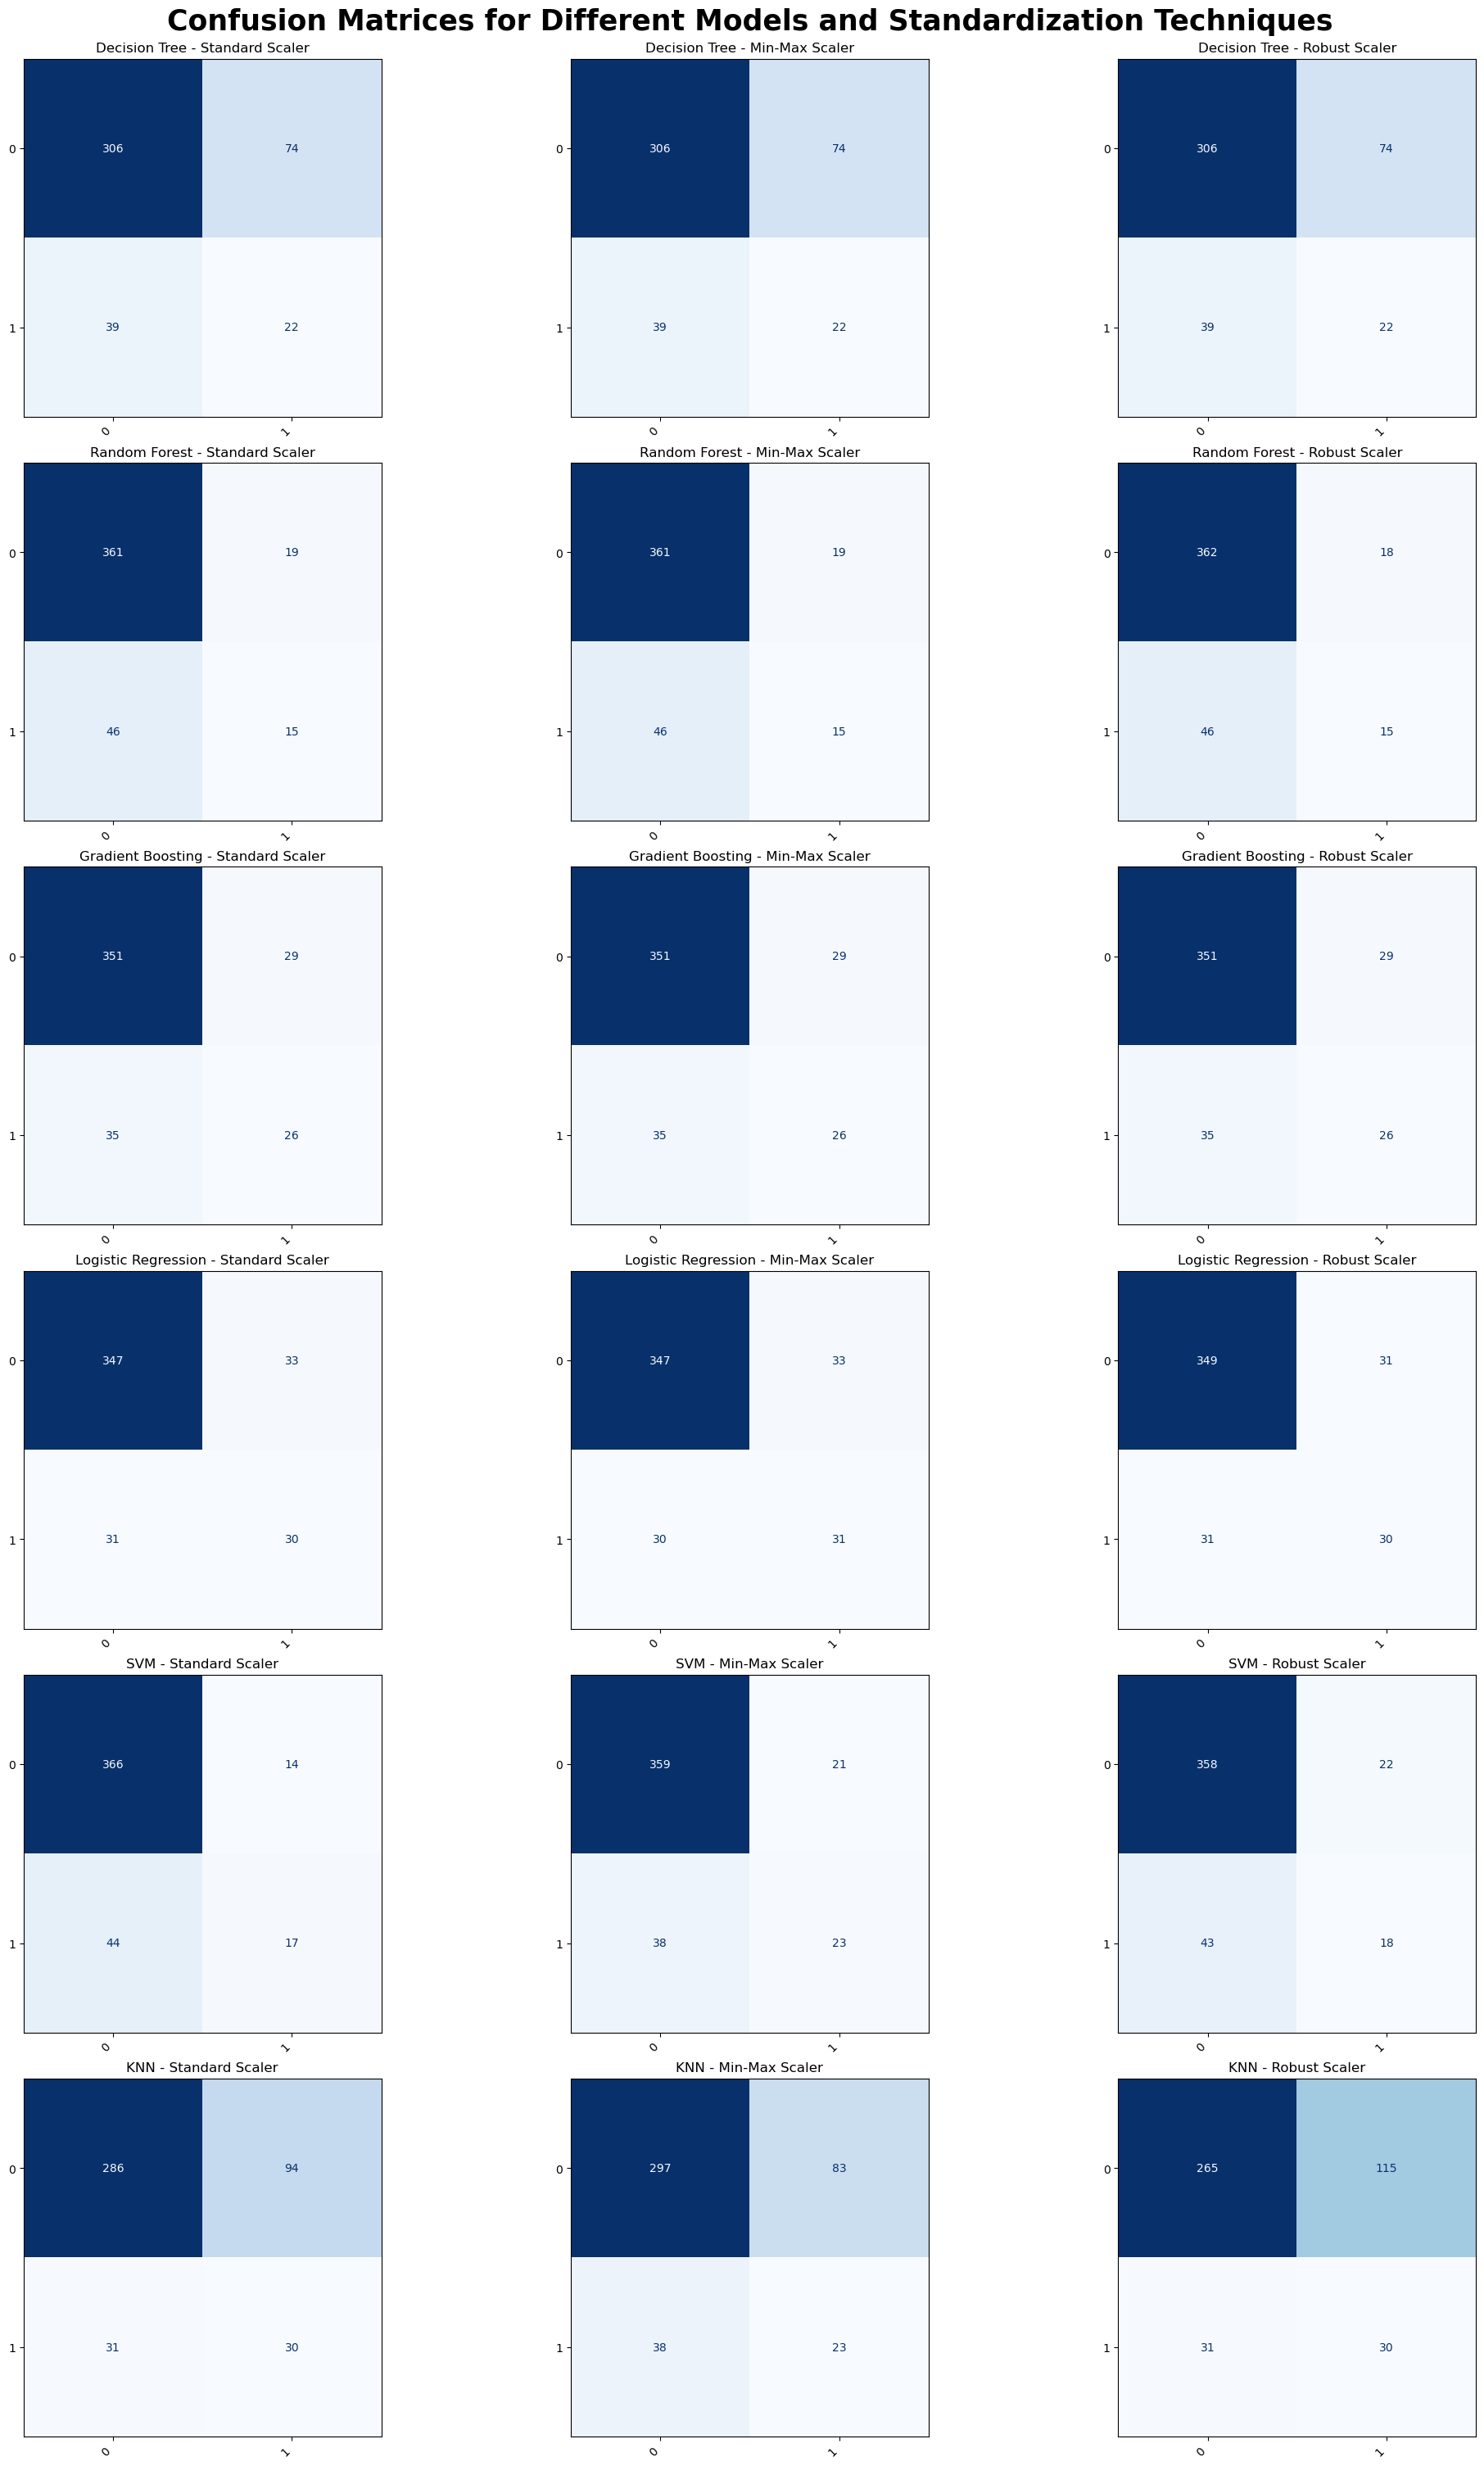

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize dictionaries to store results
results_d1 = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, **best_params.get('Decision Tree', {})),
    'Random Forest': RandomForestClassifier(random_state=42, **best_params.get('Random Forest', {})),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **best_params.get('Gradient Boosting', {})),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params.get('Logistic Regression', {})),
    'SVM': SVC(**best_params.get('SVM', {})),
    'KNN': KNeighborsClassifier(**best_params.get('KNN', {}))
}

scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

results1 = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train_smote)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train_smote)

        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train_smote, model.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, y_test_pred)

        results_d1["Model"].append(model_name)
        results_d1["Scaler"].append(scaler_name)
        results_d1["Train Accuracy"].append(train_acc)
        results_d1["Test Accuracy"].append(test_acc)
        results1[model_name][scaler_name]['y_true'] = y_test
        results1[model_name][scaler_name]['y_pred'] = y_test_pred

# Plot confusion matrices
num_models = len(models)
num_scalers = len(scalers)

fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

for i, (model_name, _) in enumerate(models.items()):
    for j, (scaler_name, _) in enumerate(scalers.items()):
         ax = axes[i, j]
         y_test = results1[model_name][scaler_name]['y_true']
         y_pred = results1[model_name][scaler_name]['y_pred']

         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

         ax.set_title(f'{model_name} - {scaler_name}')
         ax.set_xlabel('')
         ax.set_ylabel('')
         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=25, weight='bold')
plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
plt.show()


In [213]:
results_df = pd.DataFrame(results_d1)
results_df

Model           Scaler  Train Accuracy  Test Accuracy
0         Decision Tree  Standard Scaler        1.000000       0.743764
1         Decision Tree   Min-Max Scaler        1.000000       0.743764
2         Decision Tree    Robust Scaler        1.000000       0.743764
3         Random Forest  Standard Scaler        1.000000       0.852608
4         Random Forest   Min-Max Scaler        1.000000       0.852608
5         Random Forest    Robust Scaler        1.000000       0.854875
6     Gradient Boosting  Standard Scaler        0.956624       0.854875
7     Gradient Boosting   Min-Max Scaler        0.956624       0.854875
8     Gradient Boosting    Robust Scaler        0.956624       0.854875
9   Logistic Regression  Standard Scaler        0.853458       0.854875
10  Logistic Regression   Min-Max Scaler        0.851700       0.857143
11  Logistic Regression    Robust Scaler        0.856389       0.859410
12                  SVM  Standard Scaler        0.960141       0.868481
13                  SVM   Min-Max Scaler        0.929074       0.866213
14                  SVM    Robust Scaler        0.940211       0.852608
15                  KNN  Standard Scaler        0.909144       0.716553
16                  KNN   Min-Max Scaler        0.898593       0.725624
17                  KNN    Robust Scaler        0.887456       0.668934

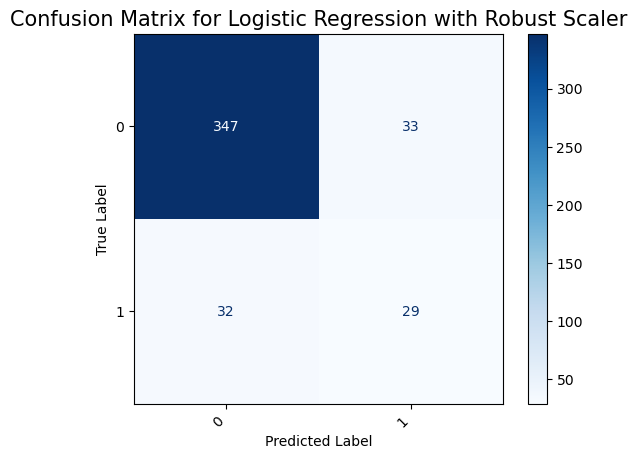

In [214]:
X = df_rfe.drop('Attrition_Yes', axis=1)
y = df_rfe['Attrition_Yes']

# Split data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(C=0.58,penalty='l1',solver='liblinear' ,max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Logistic Regression with Robust Scaler', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('logistic_robust_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [215]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.91       380
     Class 1       0.47      0.48      0.47        61

    accuracy                           0.85       441
   macro avg       0.69      0.69      0.69       441
weighted avg       0.85      0.85      0.85       441



In [216]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already defined and contains the data
X = df.drop("Attrition_Yes", axis=1)
y = df["Attrition_Yes"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Find the best 5 features using chi-squared test
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

# Create a DataFrame with feature names and their scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': select_feature.scores_
})

# Sort the DataFrame by the scores in descending order
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

print(sorted_feature_scores)


                                              Feature          Score
0                              Income_JobSatisfaction  460272.757858
1                                           DailyRate     248.292348
2                                YearsWithCurrManager      82.083025
3                                                 Age      78.279086
4                                        OverTime_Yes      54.598441
5                                MaritalStatus_Single      35.737405
6                                    DistanceFromHome      31.928833
7                                         MonthlyRate      31.760770
8       JobRole_Department_Sales Representative_Sales      29.843464
9                                    StockOptionLevel      24.040447
10                            YearsSinceLastPromotion      12.047934
11                      MonthlyIncomedcat_15000-20000       9.768525
12                                 NumCompaniesWorked       9.319546
13                         TotalWo

In [217]:

top_10_features = sorted_feature_scores.head(10)


top_10_feature_names = top_10_features['Feature'].tolist()

print(top_10_feature_names)

['Income_JobSatisfaction', 'DailyRate', 'YearsWithCurrManager', 'Age', 'OverTime_Yes', 'MaritalStatus_Single', 'DistanceFromHome', 'MonthlyRate', 'JobRole_Department_Sales Representative_Sales', 'StockOptionLevel']


In [218]:
df_chi = df[['Income_JobSatisfaction', 'DailyRate', 'YearsWithCurrManager', 'Age', 'OverTime_Yes', 'MaritalStatus_Single', 'DistanceFromHome', 'MonthlyRate', 'JobRole_Department_Sales Representative_Sales', 'StockOptionLevel','Attrition_Yes']]

In [219]:
X = df_chi.drop("Attrition_Yes",axis=1)
y = df_chi["Attrition_Yes"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

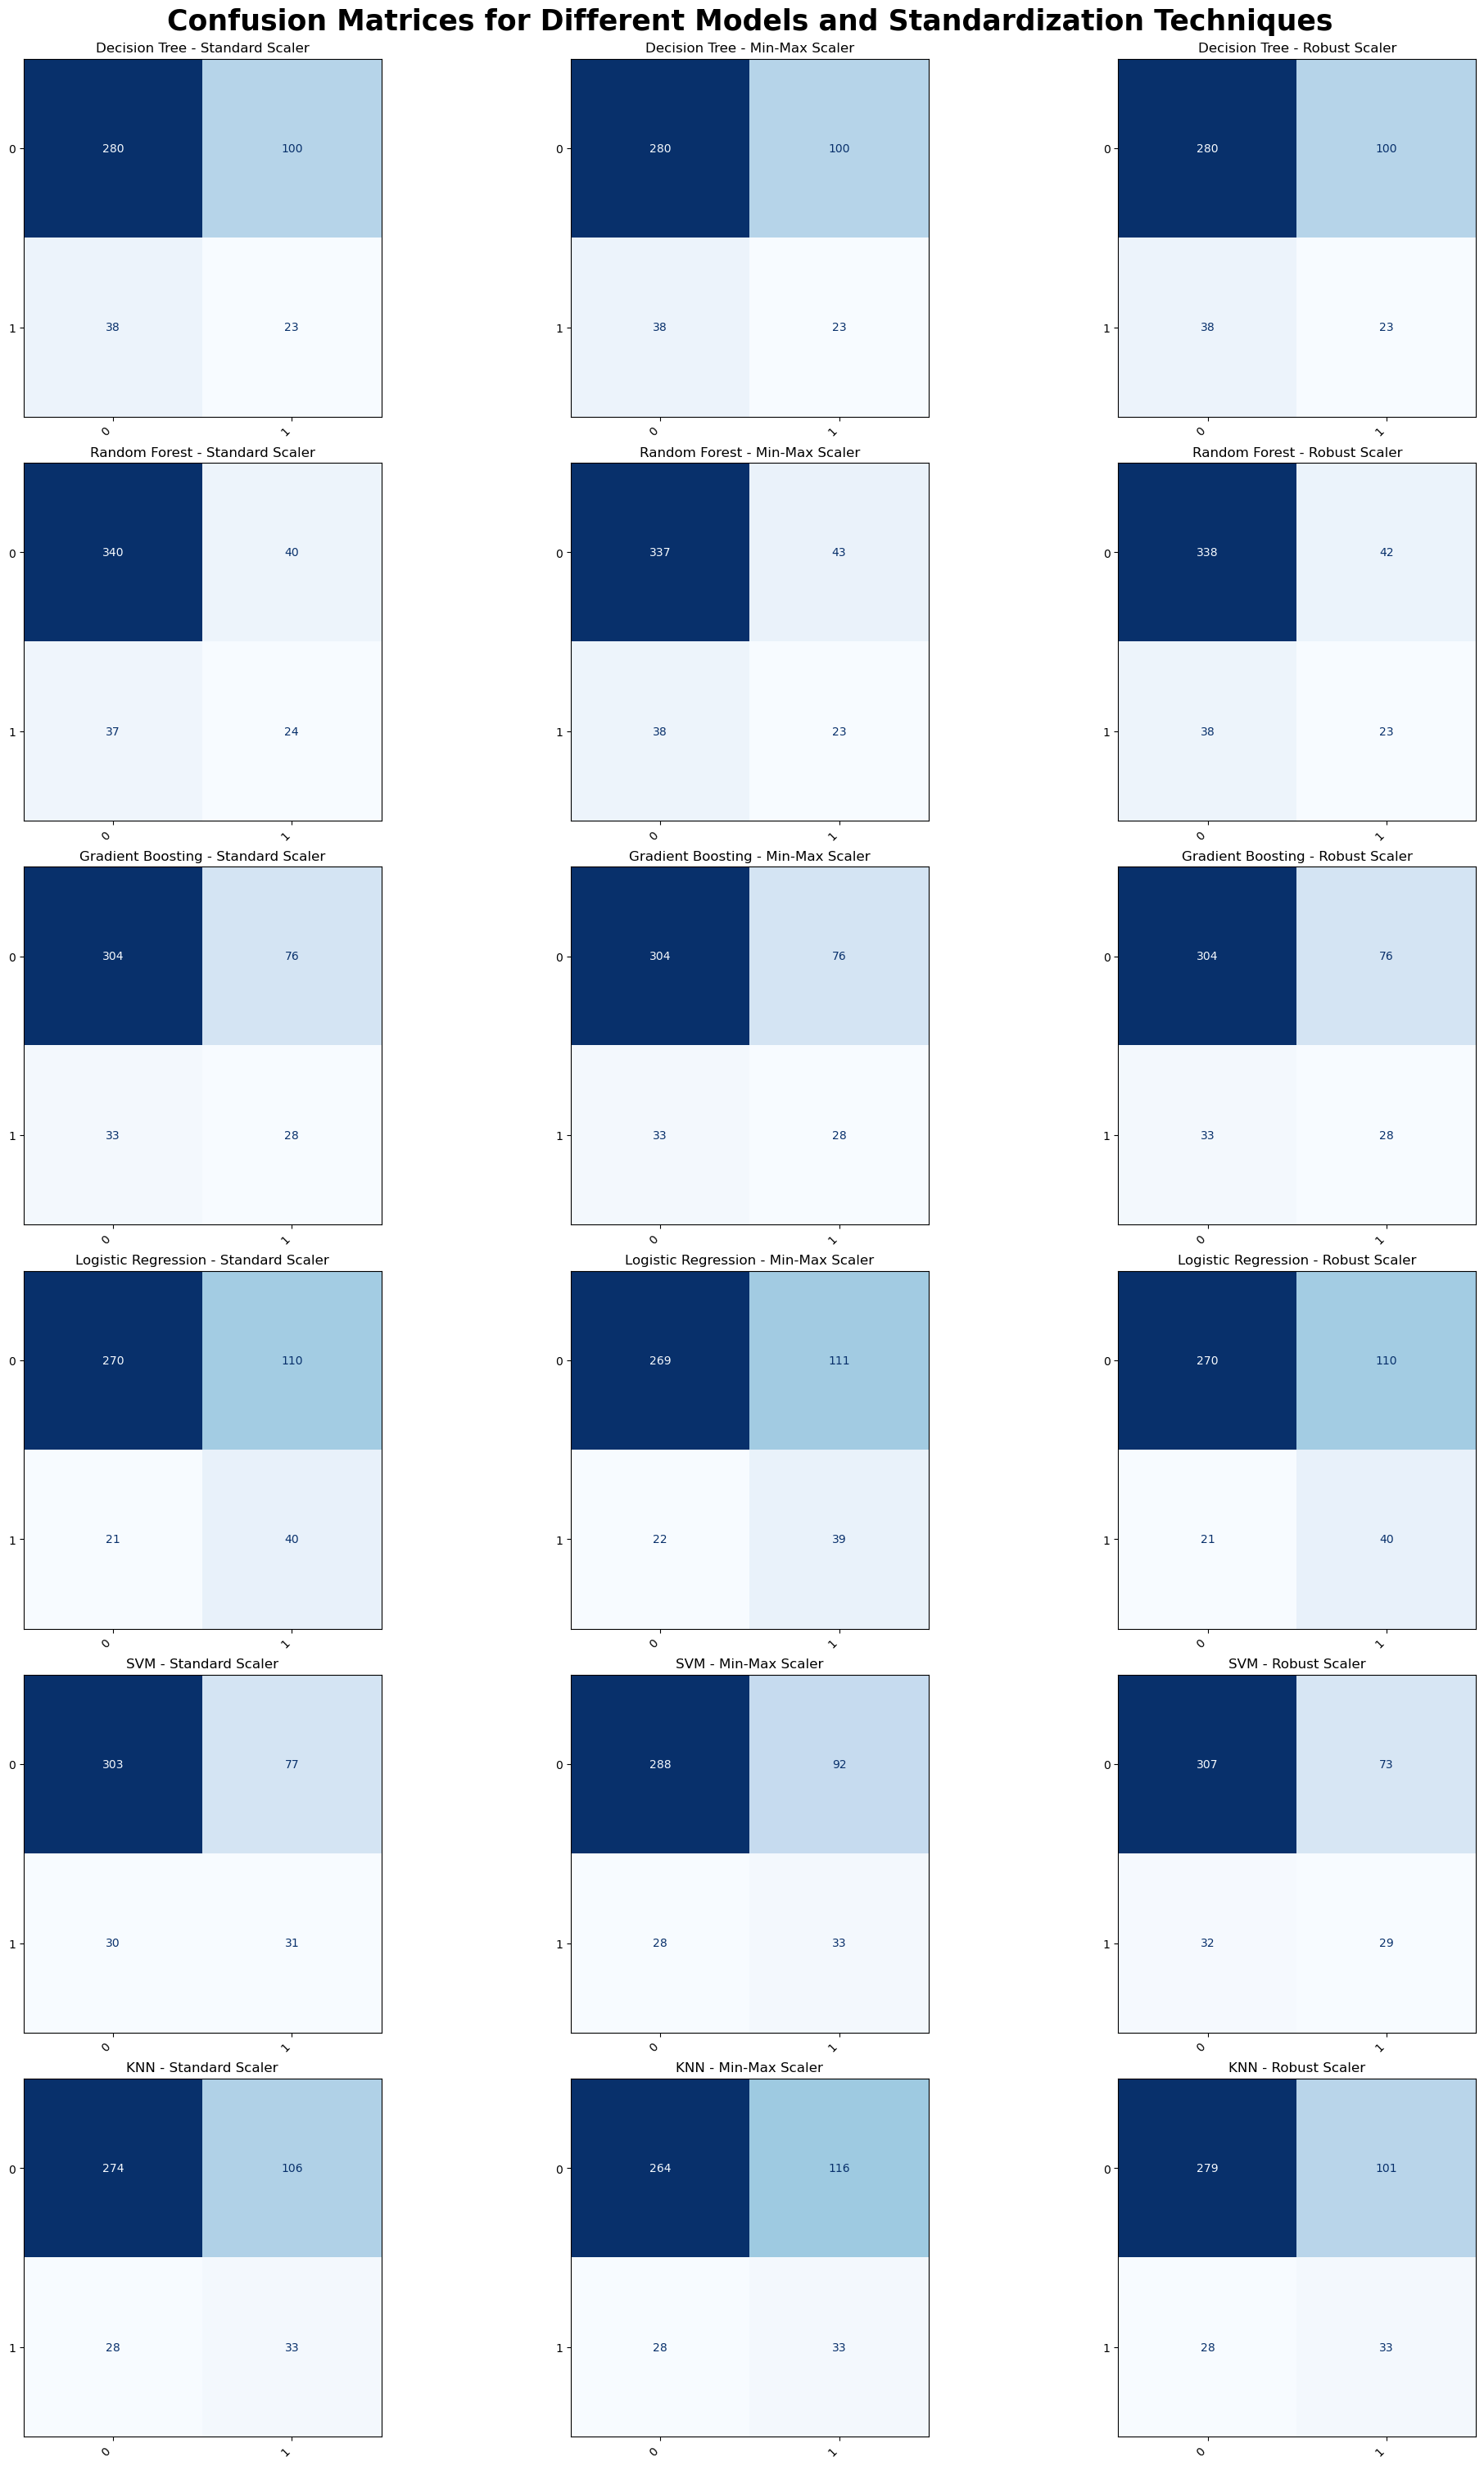

In [220]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize dictionaries to store results
results_d1 = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, **best_params.get('Decision Tree', {})),
    'Random Forest': RandomForestClassifier(random_state=42, **best_params.get('Random Forest', {})),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **best_params.get('Gradient Boosting', {})),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params.get('Logistic Regression', {})),
    'SVM': SVC(**best_params.get('SVM', {})),
    'KNN': KNeighborsClassifier(**best_params.get('KNN', {}))
}

scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

results1 = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train_smote)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train_smote)

        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train_smote, model.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, y_test_pred)

        results_d1["Model"].append(model_name)
        results_d1["Scaler"].append(scaler_name)
        results_d1["Train Accuracy"].append(train_acc)
        results_d1["Test Accuracy"].append(test_acc)
        results1[model_name][scaler_name]['y_true'] = y_test
        results1[model_name][scaler_name]['y_pred'] = y_test_pred

# Plot confusion matrices
num_models = len(models)
num_scalers = len(scalers)

fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

for i, (model_name, _) in enumerate(models.items()):
    for j, (scaler_name, _) in enumerate(scalers.items()):
         ax = axes[i, j]
         y_test = results1[model_name][scaler_name]['y_true']
         y_pred = results1[model_name][scaler_name]['y_pred']

         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

         ax.set_title(f'{model_name} - {scaler_name}')
         ax.set_xlabel('')
         ax.set_ylabel('')
         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=25, weight='bold')
plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
plt.show()


In [221]:
results_df = pd.DataFrame(results_d1)
results_df

Model           Scaler  Train Accuracy  Test Accuracy
0         Decision Tree  Standard Scaler        1.000000       0.687075
1         Decision Tree   Min-Max Scaler        1.000000       0.687075
2         Decision Tree    Robust Scaler        1.000000       0.687075
3         Random Forest  Standard Scaler        1.000000       0.825397
4         Random Forest   Min-Max Scaler        1.000000       0.816327
5         Random Forest    Robust Scaler        1.000000       0.818594
6     Gradient Boosting  Standard Scaler        0.871630       0.752834
7     Gradient Boosting   Min-Max Scaler        0.871630       0.752834
8     Gradient Boosting    Robust Scaler        0.871630       0.752834
9   Logistic Regression  Standard Scaler        0.742087       0.702948
10  Logistic Regression   Min-Max Scaler        0.737984       0.698413
11  Logistic Regression    Robust Scaler        0.742673       0.702948
12                  SVM  Standard Scaler        0.825909       0.757370
13                  SVM   Min-Max Scaler        0.801290       0.727891
14                  SVM    Robust Scaler        0.819461       0.761905
15                  KNN  Standard Scaler        0.856975       0.696145
16                  KNN   Min-Max Scaler        0.855803       0.673469
17                  KNN    Robust Scaler        0.859320       0.707483

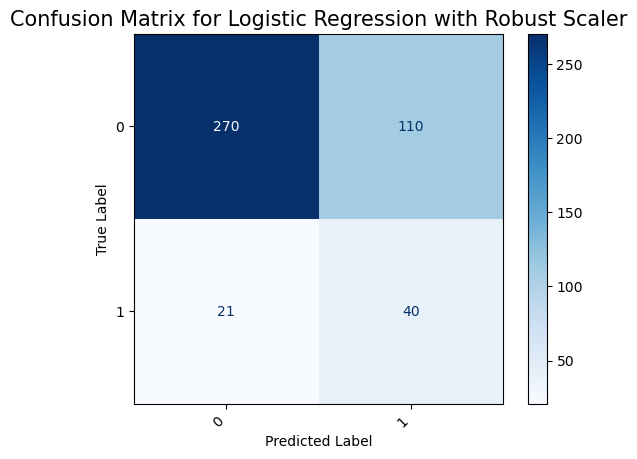

In [237]:
X = df_chi.drop('Attrition_Yes', axis=1)
y = df_chi['Attrition_Yes']

# Split data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(C=0.58,penalty='l1',solver='liblinear' ,max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Logistic Regression with Robust Scaler', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('logistic_robust_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [238]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.93      0.71      0.80       380
     Class 1       0.27      0.66      0.38        61

    accuracy                           0.70       441
   macro avg       0.60      0.68      0.59       441
weighted avg       0.84      0.70      0.75       441

